# Background information
Bangkok, as one of Southeast Asia’s most vibrant tourist destinations, has seen rapid growth in short-term rental accommodations facilitated by platforms like Airbnb. The dataset contains detailed information about Airbnb listings in Bangkok, including identifiers (listing and host IDs), location data (latitude, longitude, neighborhood), property characteristics (room type, price, minimum nights), and activity metrics (number of reviews, availability over the year, last review date). These data points collectively provide a comprehensive snapshot of the Airbnb market landscape in Bangkok, enabling analysis of host activity, pricing strategies, guest preferences, and listing performance.

# Problem Statement

The short-term rental market in Thailand—especially in tourism hubs like Bangkok—is experiencing rapid growth. Platforms such as Airbnb have opened opportunities for property owners and managers to reach a global audience.

However, many stakeholders still rely on intuition or inconsistent strategies for pricing, marketing, and managing availability. Without leveraging data, they risk missing opportunities to:

- Align with guest preferences.

- Identify high demand locations and listing types.

- Identify pricing based on property and locations

This analysis uses Bangkok Airbnb data to address the following key business questions:


Market Distribution
---
1. Neighborhood Supply Patterns

  - Which neighborhoods have the highest concentration of listings, and how is supply distributed across Bangkok?

2. Room Type & Location Trends

  - How does room type availability vary by neighborhood, and are certain types more concentrated in specific areas?

3. Stay Duration Preferences

  - What are the common minimum night stay requirements, and which areas cater more to short-term vs long-term guests?

  - Host & Market Structure

  - How many properties do hosts typically manage, and where are high-volume hosts most active?

Competition
---
4. Large Operator Concentration

  - Where are large-scale operators (50+ properties) located, and are they clustered in high-demand or high-value neighborhoods?

5. Medium Operator Distribution

  - How widespread are medium operators (11–50 properties), and in which neighborhoods are they most active?

6. Competitive Landscape

  - How does the presence of large vs. medium operators vary across Bangkok’s neighborhoods?

Price
---

7. Price Distribution Across Neighborhoods

  - Which neighborhoods command the highest median prices?

  - Which neighborhoods have the lowest median prices?

  - How wide is the overall price range across Bangkok neighborhoods?

8. Price by Room Type

  - How do median prices vary between different room types?

  - Which room types are typically the most expensive, and which are the cheapest?

  - Are there statistically significant differences in prices between room types?

9. Neighborhood & Room Type Interaction

  - How do prices for each room type vary by neighborhood?

  - Which neighborhoods have unusually high or low prices for specific room types?

  - Are there extreme price outliers that may skew perceptions or indicate niche luxury/low-cost markets?

10. Strategic Pricing Opportunities

  - In which neighborhoods can certain room types command premium prices?

Demand
---
11. Demand Distribution

  - How is demand (total bookings and bookings in the last 12 months) distributed across different room types?

  - Which neighborhoods consistently attract the highest booking volumes?

12. High-Demand Pricing Dynamics

  - In high-demand areas, which room types are able to sustain premium pricing while maintaining strong booking levels?

  - Are there specific neighborhoods where guests show a strong willingness to pay above market averages for certain room types?

13. Room Type–Location Performance

  - Which neighborhoods deliver the best combination of high demand and high pricing for each room type?

  - How wide is the price spread within each room type, and how much is it influenced by neighborhood characteristics?

14. Strategic Demand Drivers

  - Beyond price, what other factors (location, amenities, property type, seasonality) are likely influencing booking patterns in high-demand segments?

15. Demand Concentration

  - What proportion of total listings achieve high demand, and how does this vary by room type?

16. Room Type Performance Gap

  - Which room types are most overrepresented in the high-demand segment, and which are underrepresented?

  - How can property managers adjust inventory to align with market preferences?

17. Geographic Demand Distribution

  - Which neighborhoods have high-demand listings, and which areas currently lack them?

  - Do these gaps represent untapped opportunities or reflect low inherent demand?

18. Market Structure

  - How do statistical tests (Chi-square) confirm that observed differences in room type distribution are structural and not random?

High Demand vs All Listings
---

19. Market Share

  - What proportion of listings achieve high demand (>=50 bookings), and how is this distributed across Bangkok?

20. Room Type Preferences

  - Which room types dominate in high-demand segments, and how does this compare to the overall market distribution?

21. Geographic Coverage

  - Which neighborhoods have high-demand listings, and which areas have none?

22. Structural Differences

  - Do room type distributions in high-demand listings differ significantly from the overall market, and what does this reveal about guest preferences?

# Import Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import requests
from folium.plugins import HeatMap
from wordcloud import WordCloud, STOPWORDS

# Read CSV

In [2]:
# Define google sheets URL
sheet_url = 'https://docs.google.com/spreadsheets/d/1iIYtGo2iTvYorfouXoyKki_l4QjuByHrk651Yd_Uwd0/edit?gid=1910378572#gid=1910378572'

# Transform google sheets into CSV
sheet_url_csv = sheet_url.replace('/edit?gid=', '/export?format=csv&gid=').replace('/edit#gid=', '/export?format=csv&gid=')

# Transform csv to df
df = pd.read_csv(sheet_url_csv)

# Feature Information


## access pdf here: https://issuu.com/urielss/docs/airbnb_listings_bangkok_data_dictionary

| **No** | **Column Name**                      | **Description**                                                                                                                                                                                                                                                                       |
|--------|---------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 1      | **id**                                | Airbnb's unique identifier for the listing.                                                                                                                                                                                                                                          |
| 2      | **name**                              | Name of the listing.                                                                                                                                                                                                                                                                 |
| 3      | **host_name**                         | Name of the host (usually just the first name).                                                                                                                                                                                                                                      |
| 4      | **neighbourhood**                     | Neighborhood geocoded using the latitude and longitude against neighborhoods defined by public digital shapefiles.                                                                                                                            |
| 5      | **latitude**                          | Latitude using the World Geodetic System (WGS84) projection.                                                                                                                                                                                                                         |
| 6      | **longitude**                         | Longitude using the World Geodetic System (WGS84) projection.                                                                                                                                                                                                                        |
| 7      | **room_type**                         | Type of room offered: <br> - Entire home/apt <br> - Private room <br> - Shared room <br> - Hotel                                                                                                                                                                                      |
| 8      | **price**                             | Daily price in local currency (may include a "$" sign regardless of locale).                                                                                                                                                                                                         |
| 9      | **minimum_nights**                    | Minimum number of nights required for a booking (calendar rules may differ).                                                                                                                                                                                                         |
| 10     | **number_of_reviews**                 | Total number of reviews the listing has received.                                                                                                                                                                                                                                    |
| 11     | **last_review**                       | Date of the most recent review.                                                                                                                                                                                                                                                      |
| 12     | **calculated_host_listings_count**    | Number of listings the host has in the current scrape for the city/region.                                                                                                                                                                                                           |
| 13     | **availability_365**                  | Number of days in the next 365 days the listing is available (may be blocked or booked).                                                                                                                                                                                             |
| 14     | **number_of_reviews_ltm**             | Number of reviews in the last 12 months.                                                                                                                                                                                                                                             |
| 15     | **operators** *(feature engineered)*  | Categorization based on `calculated_host_listings_count`: <br> - Owner: ≤ 2 properties managed <br> - Small operator: 3–10 properties managed <br> - Medium operator: 11–50 properties managed <br> - Large operator: > 50 properties managed                                                                        |
| 16     | **stay** *(feature engineered)*       | Categorization based on `minimum_nights`: <br> - Short: 1–7 nights <br> - Medium: 8–30 nights <br> - Long: 31–180 nights <br> - Permanent: > 180 nights                                                                                                                               |


# DataFrame information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  float64
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

In [4]:
df.head(20)

Unnamed: 0         id                                            name  \
0            0    27934.0                 Nice room with superb city view   
1            1    27979.0                  Easy going landlord,easy place   
2            2    28745.0               modern-style apartment in Bangkok   
3            3    35780.0  Spacious one bedroom at The Kris Condo Bldg. 3   
4            4   941865.0                      Suite Room 3 at MetroPoint   
5            5  1704776.0                  NEw Pro!!  Bungalow Bkk Centre   
6            6    48736.0                 Condo with Chaopraya River View   
7            7  1738669.0                 1 chic bedroom apartment in BKK   
8            8  1744248.0              Batcave, Pool view, near Chatuchak   
9            9   952677.0                   Standard Room Decor do Hostel   
10          10    55681.0                   Sathorn Terrace Apartment(61)   
11          11  1765918.0                  2BR apt in a cozy neighborhood   
12          12    55686.0    Comfy bedroom near River pier & BTS  Taksin.   
13          13    59221.0                budget hotel bangkok near subway   
14          14   959254.0              Deluxe Condo, Nana, Pool/GYM/Sauna   
15          15    62217.0              Luxury@swimpool/FreeWiFi/nearJJMkt   
16          16  1791481.0             Nice and Quiet condo near BTS Onnut   
17          17    66046.0                24Flr- 1br Apt near JJ, MRT, BTS   
18          18   105042.0             Central Bangkok 3 Bedroom Apartment   
19          19  1793000.0                The Duplex - Asoke- Luxury 92sqm   

    host_id   host_name  neighbourhood  latitude  longitude        room_type  \
0    120437      Nuttee    Ratchathewi  13.75983  100.54134  Entire home/apt   
1    120541         Emy        Bang Na  13.66818  100.61674     Private room   
2    123784  Familyroom      Bang Kapi  13.75232  100.62402     Private room   
3    153730     Sirilak      Din Daeng  13.78823  100.57256     Private room   
4    610315       Kasem      Bang Kapi  13.76872  100.63338     Private room   
5   2129668    Wimonpak  Bang Kho laen  13.69757  100.52880  Entire home/apt   
6    222005    Athitaya     Rat Burana  13.68556  100.49535     Private room   
7   7045870    Jiraporn     Chatu Chak  13.82925  100.56737  Entire home/apt   
8   9181769         Nol     Chatu Chak  13.81693  100.56433  Entire home/apt   
9   5171292      Somsak     Khlong San  13.72040  100.50757     Private room   
10   263049         Tor       Bang Rak  13.71934  100.51760     Private room   
11  9279712        Jing     Phaya Thai  13.77486  100.54272  Entire home/apt   
12   263049         Tor         Sathon  13.71802  100.51539       Hotel room   
13   284095        Mimi      Din Daeng  13.77941  100.57383  Entire home/apt   
14  5153476      Natcha    Khlong Toei  13.71516  100.56806  Entire home/apt   
15   302658      Srisuk     Phaya Thai  13.79152  100.53982     Private room   
16  9399478    Piyakorn    Khlong Toei  13.70719  100.59936  Entire home/apt   
17   323158         Sue     Chatu Chak  13.82298  100.56484  Entire home/apt   
18   545890       Henry    Khlong Toei  13.73378  100.56303  Entire home/apt   
19  9407280        Timo        Vadhana  13.74668  100.56137  Entire home/apt   

     price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0     1905               3                 65  2020-01-06               0.50   
1     1316               1                  0         NaN                NaN   
2      800              60                  0         NaN                NaN   
3     1286               7                  2  2022-04-01               0.03   
4     1905               1                  0         NaN                NaN   
5     1000             250                 19  2017-08-03               0.17   
6     1558               3                  1  2014-02-03               0.01   
7     1461               1                  0         NaN        

# Data Cleaning

## Check data distribution of numerical columns

In [5]:
df_numerical = df[['price', 'minimum_nights','number_of_reviews','availability_365','calculated_host_listings_count', 'number_of_reviews_ltm']]

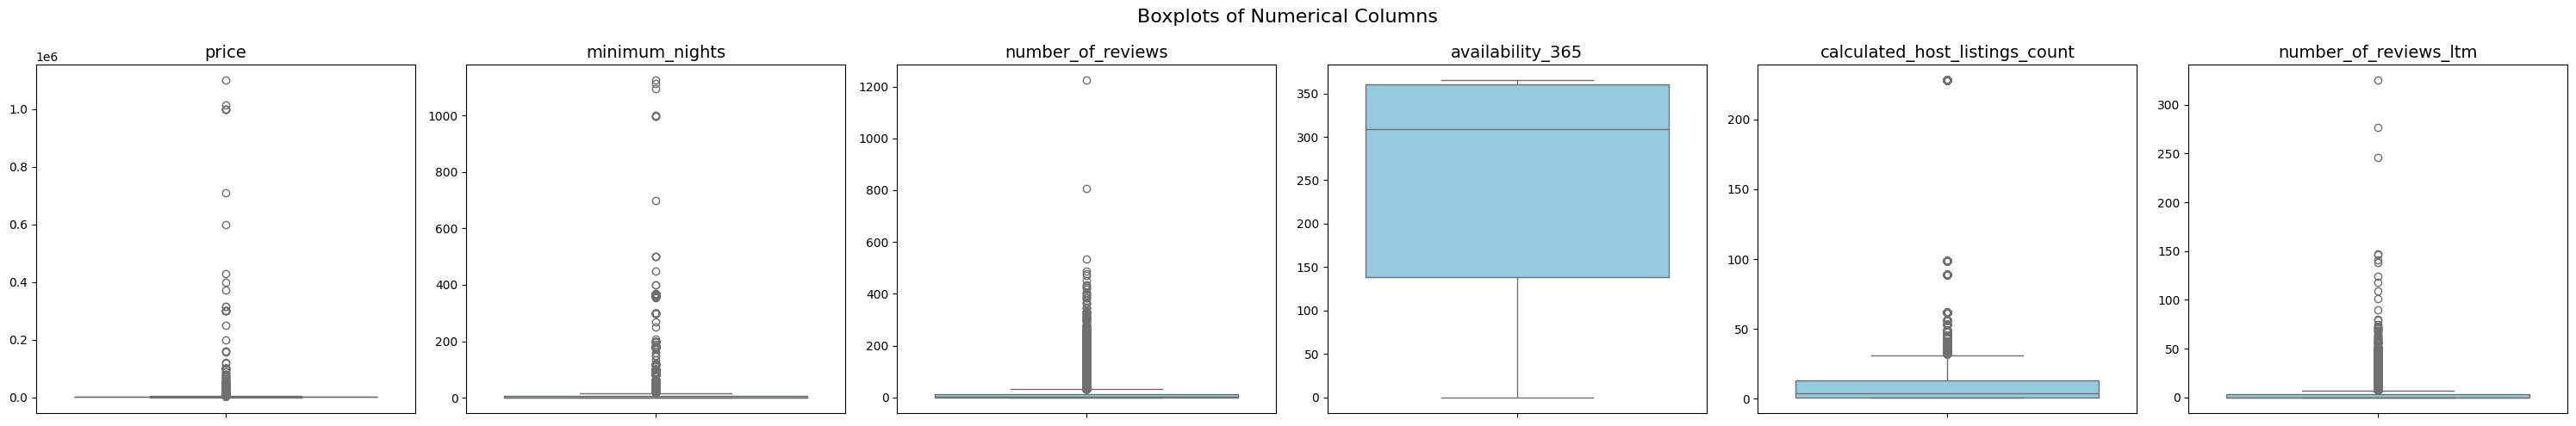

In [6]:
columns = df_numerical.columns
n_cols = len(columns)

# Create one row of subplots
fig, axes = plt.subplots(nrows=1, ncols=n_cols, figsize=(5 * n_cols, 5))

# Loop through columns and plot each boxplot
for i, col in enumerate(columns):
    sns.boxplot(y=df_numerical[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f'{col}', fontsize=14)
    axes[i].set_ylabel('')
    axes[i].set_xlabel('')

plt.suptitle('Boxplots of Numerical Columns', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Space for subtitle
plt.show()

## Check data for anomalies with df.describe()

In [7]:
df.describe(include= 'all')

Unnamed: 0            id  \
count   15854.000000  1.585400e+04   
unique           NaN           NaN   
top              NaN           NaN   
freq             NaN           NaN   
mean     7926.500000  1.579397e+17   
std      4576.799919  2.946015e+17   
min         0.000000  2.793400e+04   
25%      3963.250000  2.104509e+07   
50%      7926.500000  3.503734e+07   
75%     11889.750000  5.256154e+07   
max     15853.000000  7.908162e+17   

                                                    name       host_id  \
count                                              15846  1.585400e+04   
unique                                             14794           NaN   
top     New!  La Chada Night Market studio 2PPL near MRT           NaN   
freq                                                  45           NaN   
mean                                                 NaN  1.541058e+08   
std                                                  NaN  1.318726e+08   
min                                                  NaN  5.892000e+04   
25%                                                  NaN  3.974431e+07   
50%                                                  NaN  1.224556e+08   
75%                                                  NaN  2.390547e+08   
max                                                  NaN  4.926659e+08   

       host_name neighbourhood      latitude     longitude        room_type  \
count      15853         15854  15854.000000  15854.000000            15854   
unique      5312            50           NaN           NaN                4   
top        Curry       Vadhana           NaN           NaN  Entire home/apt   
freq         228          2153           NaN           NaN             8912   
mean         NaN           NaN     13.745144    100.559903              NaN   
std          NaN           NaN      0.043040      0.050911              NaN   
min          NaN           NaN     13.527300    100.329550              NaN   
25%          NaN           NaN     13.720090    100.529690              NaN   
50%          NaN           NaN     13.738490    100.561415              NaN   
75%          NaN           NaN     13.759497    100.585150              NaN   
max          NaN           NaN     13.953540    100.923440              NaN   

               price  minimum_nights  number_of_reviews last_review  \
count   1.585400e+04    15854.000000       15854.000000       10064   
unique           NaN             NaN                NaN        1669   
top              NaN             NaN                NaN  2022-12-11   
freq             NaN             NaN                NaN         189   
mean    3.217704e+03       15.292355          16.654157         NaN   
std     2.497212e+04       50.815020          40.613331         NaN   
min     0.000000e+00        1.000000           0.000000         NaN   
25%     9.000000e+02        1.000000           0.000000         NaN   
50%     1.429000e+03        1.000000           2.000000         NaN   
75%     2.429000e+03        7.000000          13.000000         NaN   
max     1.100000e+06     1125.000000        1224.000000         NaN   

        reviews_per_month  calculated_host_listings_count  availability_365  \
count        10064.000000                    15854.000000      15854.000000   
unique                NaN                             NaN               NaN   
top                   NaN                             NaN               NaN   
freq                  NaN                             NaN               NaN   
mean             0.813145                       13.889618        244.378643   
std              1.090196                       30.269848        125.843224   
min              0.010000                        1.000000          0.000000   
25%              0.120000                        1.000000        138.000000   
50%              0.435000                        4.000000        309.000000   
75%              1.060000                       13.000000        360.000

## **Steps for cleaning**

**Change or remove columns**
1. The 'Unnamed: 0' column seems to be unnecessary to the broader df
2. The 'id' and 'host_id' column should be changed to string to better analyze listings performance based on 'host_id' using descriptive statistics
3. The 'reviews_per_month' column should be changed from float to integer for better viewing
4. The 'last_review' column should be changed to datetime in order for time series analysis to be utilized

**Removing irregular datas**
5. Remove datas inside the 'minimum_nights' column based on Airbnb regulations (maximum 720 minimum_nights per listing/booking)
6. Remove prices that are below 1 baht since Airbnb doesn't allow for prices to be free in their listing

**Data distribution in columns containing numerical data**
7. Although **'price', 'minimum_nights', 'number_of_reviews', 'number_of_reviews_ltm' , and 'calculated_host_listings_count'** contain extreme outliers, these columns reflects the 'natural' distribtuion of the business world.
  - Some properties are more expensive than others depending on luxury
  - Some properties have more demand than others
  - Some hosts manage way more listings depending on their asset
8. All statisitcal analysis using numerical columns will be done using median due to the skewed distribution of the data

## Change or remove columns

### Drop column 'Unnamed: 0' due to irrelevancy

In [8]:
df = df.drop(columns='Unnamed: 0')
df.head()

id                                            name  host_id  \
0   27934.0                 Nice room with superb city view   120437   
1   27979.0                  Easy going landlord,easy place   120541   
2   28745.0               modern-style apartment in Bangkok   123784   
3   35780.0  Spacious one bedroom at The Kris Condo Bldg. 3   153730   
4  941865.0                      Suite Room 3 at MetroPoint   610315   

    host_name neighbourhood  latitude  longitude        room_type  price  \
0      Nuttee   Ratchathewi  13.75983  100.54134  Entire home/apt   1905   
1         Emy       Bang Na  13.66818  100.61674     Private room   1316   
2  Familyroom     Bang Kapi  13.75232  100.62402     Private room    800   
3     Sirilak     Din Daeng  13.78823  100.57256     Private room   1286   
4       Kasem     Bang Kapi  13.76872  100.63338     Private room   1905   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
0               3                 65  2020-01-06               0.50   
1               1                  0         NaN                NaN   
2              60                  0         NaN                NaN   
3               7                  2  2022-04-01               0.03   
4               1                  0         NaN                NaN   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  
0                               2               353                      0  
1                               2               358                      0  
2                               1               365                      0  
3                               1               323                      1  
4                               3               365                      0

### Change data type of 'id' from float to str

In [9]:
df['id'] = df['id'].astype(int).astype(str)

# note: 'id' is first changed to int so it can retain its full digit when changed to str.
# (if it was changed from float to str, 'id' like '7.90476492384199e+17' will remain as '7.90476492384199e+17' when changed to string)

### Change data type of 'host_id' from float to str

In [10]:
df['host_id'] = df['host_id'].astype(str)

### Change data type of 'reviews_per_month' from float to int

In [11]:
df['reviews_per_month'] = df['reviews_per_month'].astype(str)

In [12]:
df_price = df.sort_values(by='price', ascending=False)
df_price.head(10)

id                                               name  \
12868  635676064543597312              New 1 bedroom apartment BTS MRT Asoke   
12300  562972065309061696  3B中文No Guest Service Fee@Nana Asok/Soi11 Night...   
6289             29909847       BTS轻轨线on nut站，全新一房一厅，临Tesco商场市集!New cozy 1BR   
9345             39858231                1BR cozy condo  close to ONNUT BTS.   
1239              8880974                 Modern,wifi,5m MRT&2 Shopping Mall   
4620             23740993       Modern&Luxury apartment,5min to MRT,freeWifi   
1779             11579635                 2 Bedroom,wifi,5mMRT&Shopping Mall   
15200  766201549677186560      80米轻轨站，空中泳池+健身房，I con siam沙吞河景圈，距离大皇宫4公里，乳胶床垫   
4373             22633450                                rm 1 : cozy & comfy   
11885            52940323              🎗𝘾𝙝𝙚𝙬𝙖𝙩𝙝𝙖𝙞 𝙍𝙖𝙢𝙠𝙝𝙖𝙢𝙝𝙖𝙚𝙣𝙜\nBy KhunGrape   

         host_id host_name neighbourhood   latitude   longitude  \
12868   12464705     Lucio       Vadhana  13.742186  100.560394   
12300  131427125        Jj       Vadhana  13.746660  100.559100   
6289   210559448      Cora   Khlong Toei  13.703330  100.592470   
9345   210559448      Cora   Khlong Toei  13.704960  100.591510   
1239    30803267   Yasmine   Huai Khwang  13.759950  100.569360   
4620    30803267   Yasmine   Huai Khwang  13.760650  100.568980   
1779    30803267   Yasmine   Huai Khwang  13.754710  100.565980   
15200   28589379      Lily    Khlong San  13.721270  100.495270   
4373   117057915      Jeab    Bang Phlat  13.791630  100.490380   
11885   99882630  Jiranuch     Bang Kapi  13.760820  100.633660   

             room_type    price  minimum_nights  number_of_reviews  \
12868  Entire home/apt  1100000              14                  0   
12300  Entire home/apt  1014758              30                  2   
6289   Entire home/apt  1000000               2                 69   
9345   Entire home/apt  1000000              25                  2   
1239   Entire home/apt  1000000             100                 45   
4620   Entire home/apt  1000000               1                 12   
1779   Entire home/apt  1000000             100                 53   
15200  Entire home/apt   710760              12                  0   
4373      Private room   600700               1                  9   
11885     Private room   429443               1                  0   

      last_review reviews_per_month  calculated_host_listings_count  \
12868         NaN               nan                               1   
12300  2022-09-17              0.32                              10   
6289   2020-03-12              1.39                               6   
9345   2020-02-23              0.05                               6   
1239   2016-09-05              0.51                               4   
4620   2020-03-24              0.22                               4   
1779   2018-02-20              0.64                               4   
15200         NaN               nan                               1   
4373   2020-01-26              0.17                               5   
11885         NaN               nan                               1   

       availability_365  number_of_reviews_ltm  
12868               365                      0  
12300                75                      2  
6289                 90                      0  
9345                 88                      0  
1239                180                      0  
4620                336                      0  
1779                249                      0  
15200               313                      0  
4373                330                      0  
11885               313                      0

### Change 'last_review' from str to datetime

In [13]:
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

## Check for duplicate 'id' as it is the unique key

In [14]:
df_duplicate = df[df.duplicated(subset=['id'])]
df_duplicate

Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365, number_of_reviews_ltm]
Index: []

## Null Handling

In [15]:
df.isnull().sum()

id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

**Conclusion:**

1. Since the amounth of Null values from 'reviews_per_month' correspond with 'last_review', they are treated as not having a review. Therefore, Null values inside 'reviews_per_month' is treated as 0.

2. Null values  inside 'name' and 'host_name' is ignored due to being less than 0,01% of the data inside each respective columns.

### Percentage of null values per column

In [16]:
null_percentage = df.isnull().sum() * 100 / len(df)
display(null_percentage)

id                                 0.000000
name                               0.050460
host_id                            0.000000
host_name                          0.006308
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       36.520752
reviews_per_month                  0.000000
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
dtype: float64

### Impute missing values in columns 'reviews_per_month'

In [17]:
# missing values in this column is treated as not having reviews

df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

### Check if number of duplicate 'host_id' is the same as 'calculated_host_listings_count'

In [18]:
df_duplicate = df[df.duplicated(subset=['host_id'])]
df_duplicate

id                                               name  \
12                  55686       Comfy bedroom near River pier & BTS  Taksin.   
27                 121410                MetroPoint Suite Room, Near Airport   
35                 166267              1Bed apt. near Chula University/Silom   
42                 985743                         Room with city view of BKK   
43                 988373                BangLuang House 2@ Bangkok Thailand   
...                   ...                                                ...   
15848  790460476887977984  Euro LuxuryHotel PratunamMKt TripleBdNrShoping...   
15850  790474503157243520  Euro LuxuryHotel PratunamMKt TripleBdNrShoping...   
15851  790475335086864128  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   
15852  790475546213717248  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   
15853  790476492384199040  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   

         host_id  host_name  neighbourhood   latitude   longitude  \
12        263049        Tor         Sathon  13.718020  100.515390   
27        610315      Kasem      Bang Kapi  13.767470  100.632870   
35         58920       Gael       Bang Rak  13.727330  100.525550   
42       5309669   Apiradee         Sathon  13.718030  100.546540   
43       5325919   วสวัตติ์  Phasi Charoen  13.731220  100.462280   
...          ...        ...            ...        ...         ...   
15848  491526222  Phakhamon    Ratchathewi  13.752904  100.540381   
15850  491526222  Phakhamon    Ratchathewi  13.753052  100.538738   
15851  491526222  Phakhamon    Ratchathewi  13.753169  100.538700   
15852  491526222  Phakhamon    Ratchathewi  13.754789  100.538757   
15853  491526222  Phakhamon    Ratchathewi  13.752960  100.540820   

             room_type  price  minimum_nights  number_of_reviews last_review  \
12          Hotel room   1862               2                208  2019-12-02   
27        Private room   1190               1                  0         NaT   
35     Entire home/apt   1843               7                 71  2022-11-30   
42        Private room   3500               3                  0         NaT   
43     Entire home/apt   1795               1                 95  2022-12-15   
...                ...    ...             ...                ...         ...   
15848     Private room   1400               1                  0         NaT   
15850     Private room   1429               1                  0         NaT   
15851     Private room   1214               1                  0         NaT   
15852     Private room   1214               1                  0         NaT   
15853     Private room   1214               1                  0         NaT   

      reviews_per_month  calculated_host_listings_count  availability_365  \
12                 1.44                               7               361   
27                  nan                               3               365   
35                 0.54                               2               156   
42                  nan                               3               363   
43                  0.8                               3               339   
...                 ...                             ...               ...   
15848               nan                              14               357   
15850               nan                              14               365   
15851               nan                              14               365   
15852               nan                              14               365   
15853               nan                              14               365   

       number_of_reviews_ltm  
12                         0  
27                         0  
35                         5  
42                         0  
43                        10  
...                      ...  
15848                      0  
15850                      0  
15851                      0  
15852                      0  
15853 

In [19]:
# sort df_duplicate by 'host_id' ascending
df_duplicate = df_duplicate.sort_values(by='host_id')
df_duplicate.tail(20)

id                                               name  \
13285  661269624122755072                  Superior RO-NRF- Modern Thai Room   
9039             38706931                  Modern Thai Room - Sukhumvit Asok   
9040             38707233  1BR Suite with Balcony for 3 Adults - Asok Sta...   
13281  661230130166812032                 Superior RB-NRF · Modern Thai Room   
5485             27380178  Modern Suite with Balcony,Easy to get BTS/MRT ...   
13283  661239076029975552                     Superior RB · Modern Thai Room   
13301  661357420606222336       Admiral Suite RO- NRF 1BR Suite with Balcony   
14872  758911555316839680   1 Bedroom Loft Amazing location & facilities. #3   
15585  782931992043876608                    Amazing Facilities & Central #7   
14862  758165198545317376           Most Amazing Facilities and Location! #4   
15469  774170984824005120               Luxury Loft & Amazing Facilities. #5   
15082  764445186193514240                        Best Location and Style. #1   
15327  778765217624275072                Bright Loft & Amazing facilities #6   
14995  759866089081559808       Most Amazing Facilities & Great Location. #2   
5338             26374700     Thai Boutique Hotel, 5 min walk from Asoke BTS   
2542             15425496           Sukhumvit 50 Garden Home - Room 1 Orchid   
2544             15426148    Sukhumvit 50 Garden Home - Room 3 Chrysanthemum   
2545             15426277         Sukhumvit 50 Garden Home - Room 5 Amaranth   
2546             15426876      Sukhumvit 50 Garden Home - Room 4 Dhammaraksa   
7709             34054934                                     Oh-Guest House   

        host_id        host_name neighbourhood   latitude   longitude  \
13285  98598351  Admiral Premier       Vadhana  13.743800  100.564080   
9039   98598351  Admiral Premier       Vadhana  13.738200  100.564640   
9040   98598351  Admiral Premier       Vadhana  13.738200  100.564640   
13281  98598351  Admiral Premier       Vadhana  13.733780  100.567210   
5485   98598351  Admiral Premier       Vadhana  13.739280  100.564240   
13283  98598351  Admiral Premier       Vadhana  13.743000  100.566030   
13301  98598351  Admiral Premier       Vadhana  13.726540  100.576470   
14872   9867720           Leeloo   Huai Khwang  13.744330  100.586140   
15585   9867720           Leeloo   Khlong Toei  13.725372  100.565941   
14862   9867720           Leeloo       Vadhana  13.733429  100.584912   
15469   9867720           Leeloo   Khlong Toei  13.730622  100.569555   
15082   9867720           Leeloo       Vadhana  13.736100  100.583910   
15327   9867720           Leeloo   Khlong Toei  13.729103  100.569288   
14995   9867720           Leeloo   Khlong Toei  13.728700  100.568170   
5338   98704638            Vasin   Khlong Toei  13.732680  100.562440   
2542   98862993      Charuayporn   Khlong Toei  13.706460  100.598100   
2544   98862993      Charuayporn   Khlong Toei  13.706450  100.597600   
2545   98862993      Charuayporn   Khlong Toei  13.708320  100.599180   
2546   98862993      Charuayporn   Khlong Toei  13.708670  100.598860   
7709   98903071           Nakorn       Vadhana  13.715340  100.597250   

             room_type  price  minimum_nights  number_of_reviews last_review  \
13285     Private room   5400               1                  0         NaT   
9039        Hotel room   6603               1                  0         NaT   
9040        Hotel room   4000               1                  0         NaT   
13281     Private room   6371               1                  0         NaT   
5485        Hotel room   7215               1                  0         NaT   
13283     Private room   6803               1                  0         NaT   
13301     Private room   7543               1                  0         NaT   
14872  Entire home/apt   2222               5                  1  2022-12-20   
15585  Entire home/apt   3206               3                  1  2022-12-22   
14862  E

In [20]:
id = df[df['host_id'] == '98862993']
id.info()

# note: number of duplicate 'host_id' equals to 'calculated_host_listings_count' (5 different 'host_id' was checked)

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 2540 to 2546
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              5 non-null      object        
 1   name                            5 non-null      object        
 2   host_id                         5 non-null      object        
 3   host_name                       5 non-null      object        
 4   neighbourhood                   5 non-null      object        
 5   latitude                        5 non-null      float64       
 6   longitude                       5 non-null      float64       
 7   room_type                       5 non-null      object        
 8   price                           5 non-null      int64         
 9   minimum_nights                  5 non-null      int64         
 10  number_of_reviews               5 non-null      int64         
 11  last_revi

## Removing irregular datas

### Remove irregular data inside 'minimum_nights'
Airbnb only allows minimum nights per booking to be lower than maximum nights per booking. According to Airbnb App, hosts can only rent out properties up to 730 nights per booking.

Image of minimum nights from Airbnb app: https://imgur.com/a/JZRPjnG

In [21]:
df = df[df['minimum_nights'] <= 730]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15847 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              15847 non-null  object        
 1   name                            15839 non-null  object        
 2   host_id                         15847 non-null  object        
 3   host_name                       15846 non-null  object        
 4   neighbourhood                   15847 non-null  object        
 5   latitude                        15847 non-null  float64       
 6   longitude                       15847 non-null  float64       
 7   room_type                       15847 non-null  object        
 8   price                           15847 non-null  int64         
 9   minimum_nights                  15847 non-null  int64         
 10  number_of_reviews               15847 non-null  int64         
 11  last_re

### Remove irregular data from 'price'
Outliers in the 'price' column are not removed due to the nature of the property business, where prices can vary widely depending on the level of luxury.

In [22]:
df = df[df['price'] > 0]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15846 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              15846 non-null  object        
 1   name                            15838 non-null  object        
 2   host_id                         15846 non-null  object        
 3   host_name                       15845 non-null  object        
 4   neighbourhood                   15846 non-null  object        
 5   latitude                        15846 non-null  float64       
 6   longitude                       15846 non-null  float64       
 7   room_type                       15846 non-null  object        
 8   price                           15846 non-null  int64         
 9   minimum_nights                  15846 non-null  int64         
 10  number_of_reviews               15846 non-null  int64         
 11  last_re

## Feature Engineering

### 'operators'

This column refers to the column **'calculated_host_listings_count'** and will divide operators into 3 categories based on how many properties they manage:
- Owner (properties > 2)
- Small Operator (3 - 10 properties)
- Medium Operator (11 - 50 properties)
- Large Operator (properties > 50).

 **Note:** The range of properties manage by operators were chosen based on a combination of standard knowledge in the tourism industry and the distribution of data. (**e.g.** high end managers/operators usually makes up only less than 5% of managers/operators while managing almost 50% of the property in the market)

In [23]:
def classify_operator(count):
    if count <= 2:
        return 'Owner'
    elif 3 <= count <= 10:
        return 'Small Operator'
    elif 11 <= count <= 50:
        return 'Medium Operator'
    else:
        return 'Large Operator'

# Apply the function to create the 'operators' column
df['operators'] = df['calculated_host_listings_count'].apply(classify_operator)

### 'stay'

This column refers to the column **'minimun_nights'** and will divide stay into 3 categories based on the length of the minimum nights of each listing:

- Short (1 - 7 minimum nights)
- Medium (7 - 30 minimum nights)
- Long (30 - 180)
- Permanent (minimum nights > 180)

**Note**: The minimum night range of 'Short' and 'Medium' category were chosen based on standard minimum nights in the tourism industry. 'Long' and 'Permanent' category are chosen based on combination of tourism industry standards and the distribution of data. (**e.g.** short stay properties should make up more than 70% of the properties in the area. As the minimum night increases, the amount of listings decreases.)

In [24]:
# Create 'stay' column based on minimum_nights
def classify_stay(nights):
    if 1 <= nights <= 7:
        return 'Short'
    elif 8 <= nights <= 30:
        return 'Medium'
    elif 31 <= nights <= 180:
        return 'Long'
    else:
        return 'Permanent'

df['stay'] = df['minimum_nights'].apply(classify_stay)

In [25]:
df['stay'].value_counts()

stay
Short        12111
Medium        2874
Long           648
Permanent      213
Name: count, dtype: int64

In [26]:
df.tail()

id                                               name  \
15849  790465040741092864      素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街   
15850  790474503157243520  Euro LuxuryHotel PratunamMKt TripleBdNrShoping...   
15851  790475335086864128  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   
15852  790475546213717248  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   
15853  790476492384199040  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   

         host_id  host_name neighbourhood   latitude   longitude  \
15849   94899359      Renee       Pra Wet  13.715132  100.653458   
15850  491526222  Phakhamon   Ratchathewi  13.753052  100.538738   
15851  491526222  Phakhamon   Ratchathewi  13.753169  100.538700   
15852  491526222  Phakhamon   Ratchathewi  13.754789  100.538757   
15853  491526222  Phakhamon   Ratchathewi  13.752960  100.540820   

          room_type  price  minimum_nights  number_of_reviews last_review  \
15849  Private room   2298              28                  0         NaT   
15850  Private room   1429               1                  0         NaT   
15851  Private room   1214               1                  0         NaT   
15852  Private room   1214               1                  0         NaT   
15853  Private room   1214               1                  0         NaT   

      reviews_per_month  calculated_host_listings_count  availability_365  \
15849               nan                               1               362   
15850               nan                              14               365   
15851               nan                              14               365   
15852               nan                              14               365   
15853               nan                              14               365   

       number_of_reviews_ltm        operators    stay  
15849                      0            Owner  Medium  
15850                      0  Medium Operator   Short  
15851                      0  Medium Operator   Short  
15852                      0  Medium Operator   Short  
15853                      0  Medium Operator   Short

## Documentation of cleaning

1. No duplicates were found in the column 'id' (unique value)
2. 5.790 rows of data from 'number_of_reviews' were filled with '0' for the purpose of statistical analysis in data analysis
3. Amount of 'host_id' and 'calculated_host_lisitngs_count corresponds with each other
4. 7 rows of data from 'minimum_nights' were removed due to Airbnb not allowing listings to have a minimum night of more than 730 days per listing.

# Export to CSV for Tableau

In [ ]:
def clean_lat_lon(df):
    # Clean latitude
    df['latitude'] = (
        df['latitude']
        .astype(str)
        .str.strip()
        .str.replace(',', '.')
    )
    # Clean longitude
    df['longitude'] = (
        df['longitude']
        .astype(str)
        .str.strip()
        .str.replace(',', '.')
    )
    # Convert to numeric
    df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
    df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')
    return df

# Clean both datasets
df = clean_lat_lon(df)

# Save cleaned versions
df.to_csv('airbnb_listings_clean.csv', index=False)


/tmp/ipython-input-1939771046.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['latitude'] = (
/tmp/ipython-input-1939771046.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['longitude'] = (
/tmp/ipython-input-1939771046.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

# Data Analysis

## Correlation Heatmap for preliminary research

Correlation Strength Classification
(Using common thresholds: |r| ≥ 0.5 = strong, 0.3 ≤ |r| < 0.5 = moderate, |r| < 0.3 = weak)

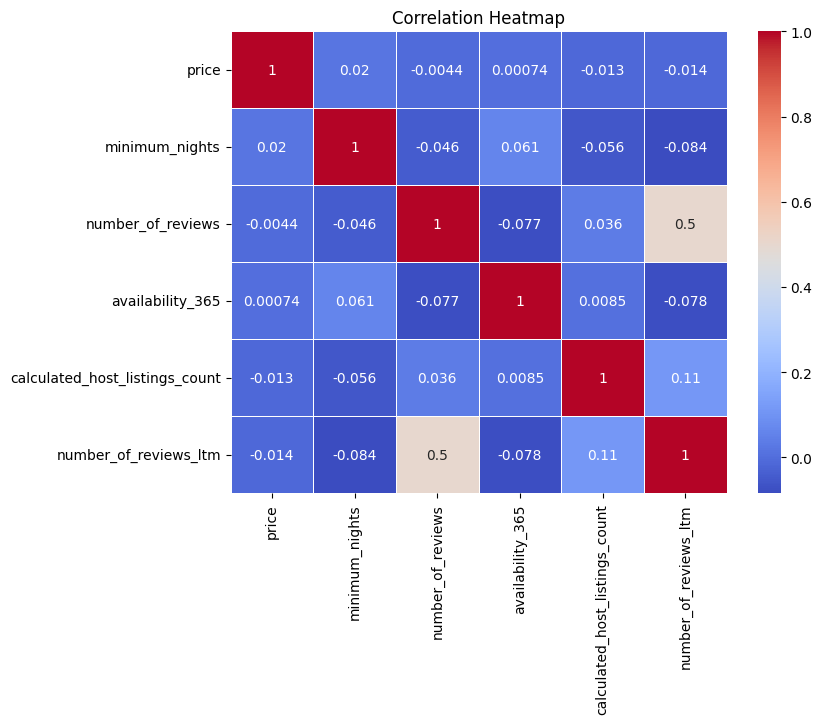

In [27]:
df_numerical = df[['price', 'minimum_nights','number_of_reviews','availability_365','calculated_host_listings_count', 'number_of_reviews_ltm']]

plt.figure(figsize=(8, 6))
sns.heatmap(df_numerical.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**Interpretation:**


Strong Correlations (|r| >= 0.5)

  - Number of Reviews <-> Number of Reviews (LTM): 0.50

  - Logical: LTM (last 12 months) reviews are a subset of total reviews.

  - Indicates a direct relationship but not perfect, due to older reviews dropping out.

---

Moderate Correlations (0.3 ≤ |r| < 0.5)

- **Not Found**

---

Weak Correlations (|r| < 0.3)
Price ↔ All other variables: near 0

  - Suggests price is set independently from operational metrics.

  - Minimum Nights ↔ Number of Reviews: -0.046

  - Minimum Nights ↔ Number of Reviews (LTM): -0.084

  - Slight negative trend — longer minimum stays may reduce booking volume.

  - Availability (365 days) ↔ Number of Reviews: -0.077

  - Availability (365 days) ↔ Number of Reviews (LTM): -0.078

  - Minimal relationship between full-year availability and booking activity.

  - Host Listings Count ↔ Number of Reviews (LTM): 0.11

  - Slight trend: multi-listing hosts may get more short-term reviews.

  - All other variable pairs: essentially no meaningful correlation.

  ---

**Insights by Strength**


  - Strong: Only review counts (total vs. LTM) are meaningfully related.

  - Moderate: None — operational factors here don’t strongly co-move.

  - Weak: Almost all other pairs — suggests pricing, availability, and host size are independent drivers.

## Analysis - Market Distribution

1. Neighborhood Supply Patterns

  - Which neighborhoods have the highest concentration of listings, and how is supply distributed across Bangkok?

2. Room Type & Location Trends

  - How does room type vary by neighborhood, and are certain types more concentrated in specific areas?

3. Stay Duration Preferences

  - What are the common minimum night stay requirements, and which areas cater more to short-term vs long-term guests?

  - How many properties do hosts typically manage, and where are high-volume hosts most active?

### Room distribution and  most popular room by neighbourhood

In [28]:
# Create a pivot table
room_pivot = df.pivot_table(index='neighbourhood', columns='room_type', aggfunc='size', fill_value=0)

# Add total_rooms as a column for analysis
room_pivot['total_rooms'] = room_pivot.sum(axis=1)

room_pivot.sort_values(by='total_rooms', ascending=False)

room_type             Entire home/apt  Hotel room  Private room  Shared room  \
neighbourhood                                                                  
Vadhana                          1451         104           543           53   
Khlong Toei                      1520          73           489           15   
Huai Khwang                       776          25           301           23   
Ratchathewi                       656          70           327           61   
Bang Rak                          351          67           375           34   
Sathon                            556          15           220           17   
Phra Nakhon                        56          77           355          131   
Phra Khanong                      336           9           201           12   
Chatu Chak                        273           2           266            7   
Bang Na                           276           9           168            3   
Parthum Wan                       254          45           140           15   
Din Daeng                         219          15           190           20   
Phaya Thai                        198          26           179           19   
Suanluang                         197           4           170           10   
Khlong San                        186          26           134           11   
Bang Kapi                         124           1           132            3   
Bang Sue                          169           0            77            3   
Bang Phlat                        132           3            76            6   
Yan na wa                         120           8            69            3   
Thon buri                          94           1            86            1   
Don Mueang                         36          10           114            7   
Pra Wet                            62           5            85            4   
Phasi Charoen                      91           1            62            1   
Bangkok Noi                        47           4            95            6   
Lat Krabang                        39          14            80           16   
Bang Kho laen                      93           2            45            0   
Lak Si                             40           5            81            0   
Pom Prap Sattru Phai               49          11            58            5   
Bang Khen                          48           3            64            1   
Samphanthawong                     45           9            47           13   
Wang Thong Lang                    33           0            64            3   
Bang Khae                          35           1            56            0   
Dusit                              12           0            71            8   
Bangkok Yai                        41           3            43            3   
Chom Thong                         44           0            29            1   
Min Buri                           26           0            35            1   
Lat Phrao                          26           0            29            2   
Khan Na Yao                        24           0            31            0   
Bueng Kum                          32           0            22            0   
Rat Burana                         34           0            19            0   
Taling Chan                        15           0            33            2   
Saphan Sung                        20           0            24            1   
Sai Mai                            18           0            22            0   
Khlong Sam Wa                      20           0            12            0   
Thung khru                          9           0            14            0   
Bang Khun thain                     7           0            12            2   
Nong Chok                           8           0             6            0   
Thawi Watthana                      5           0             7            0   


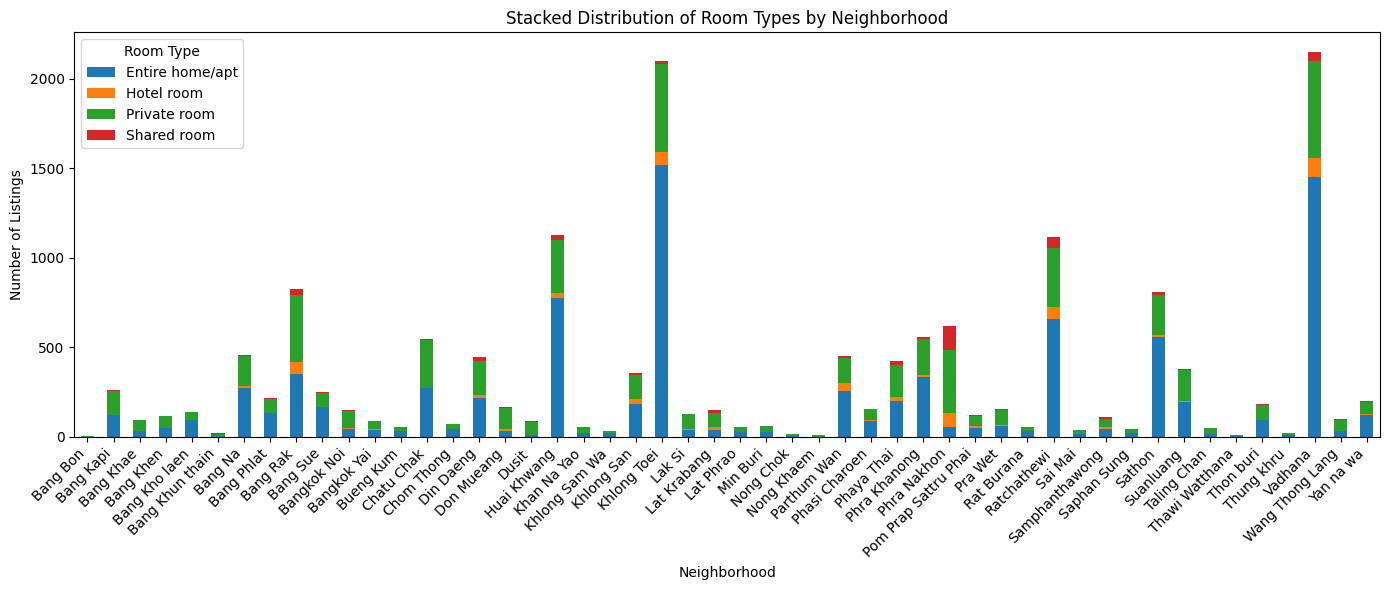

In [29]:
# Create df without total_rooms for stacked barchart
room_pivot_plot = room_pivot.drop(columns='total_rooms')

# Plot stacked bar chart
room_pivot_plot.plot(kind='bar', stacked=True, figsize=(14, 6))

plt.title('Stacked Distribution of Room Types by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Room Type')
plt.tight_layout()
plt.show()


In [30]:
room_pivot_total_rooms = room_pivot.sort_values(by='total_rooms', ascending=False)

# Show only the 'total_rooms' column
room_pivot_total_rooms[['total_rooms']].head(5)

room_type      total_rooms
neighbourhood             
Vadhana               2151
Khlong Toei           2097
Huai Khwang           1125
Ratchathewi           1114
Bang Rak               827

#### Total listings

**Insights:**

Top 5 neighbourhood by amount of **total listings**:
1. **Vadhana** (2151)
2. **Khlong Toei** (2097)
3. **Huai Khwang** (1125)
4. **Ratchathewi** (1114)
5. **Bang Rak**	(827)

##### Total room listings density using geospatial plotting

In [31]:
# 1. Create base map with CartoDB Positron for English labels
# Manually set to Bangkok's central coordinates
m = folium.Map(
    location=[13.7563, 100.5018],
    zoom_start=11,
    tiles='CartoDB Positron'
)

# 2. Prepare heatmap data from your DataFrame
heat_data = df[['latitude', 'longitude']].values.tolist()

# 3. Add HeatMap layer
HeatMap(heat_data).add_to(m)

m


**Insights:**

The entire listing seems to be **distributed equally** throughout Bangkok - indicated by **most** of the Bangkok area **filled with red** (high density) and **only the far edges** are **yellow**(medium density) and **green**(low density)

In [32]:
room_pivot_apt = room_pivot.sort_values(by='Entire home/apt', ascending=False)

# Show only the 'Entire home/apt' column
room_pivot_apt[['Entire home/apt']].head(5)

room_type      Entire home/apt
neighbourhood                 
Khlong Toei               1520
Vadhana                   1451
Huai Khwang                776
Ratchathewi                656
Sathon                     556

In [33]:
df_room_type_neighbourhood = df.groupby(['neighbourhood', 'room_type'])

#### Entire home/apt

**Insights:**

Top 5 neighbourhood by amount of **Entire home/apt**:
1. **Khlong Toei** (1520)
2. **Vadhana** (1451)
3. **Huai Khwang** (776)
4. **Ratchathewi** (656)
5. **Sathon** (556)



In [34]:
df_room_type_neighbourhood = df.groupby(['neighbourhood', 'room_type']).size().reset_index(name='count')

#Check amount of neighbourhood

df_room_type_neighbourhood['neighbourhood'].nunique()



50

In [35]:
# Check amount of neighbourhoods that have Entire home/apt

df_room_type_neighbourhood[df_room_type_neighbourhood['room_type'] == 'Entire home/apt']['neighbourhood'].nunique()

50

**Insights:**

Every neighbourhood in Bangkok has atleast 1 Entire home/apt listed in them

##### Entire home/apt listings density using geospatial plotting

In [36]:
m = folium.Map(
    location=[13.7563, 100.5018],
    zoom_start=11,
    tiles='CartoDB Positron'
)

# New df with based on room_type = Entire home/apt
df_entire_home = df[df['room_type'] == 'Entire home/apt']

HeatMap(df_entire_home[['latitude', 'longitude']].values.tolist()).add_to(m)

m

**Insights:**

Entire home/apt listings seems to have a **similar distribution** as the distribution of the entire listing. This indicates that Entire home/apt are available throughout most neighbourhoods

In [37]:
room_pivot_hotel = room_pivot.sort_values(by='Hotel room', ascending=False)

# Show only the 'Hotel room' column
room_pivot_hotel[['Hotel room']].head()

room_type      Hotel room
neighbourhood            
Vadhana               104
Phra Nakhon            77
Khlong Toei            73
Ratchathewi            70
Bang Rak               67

#### Hotel room

**Insights:**

Top 5 neighbourhood by amount of **Hotel room**:
1. **Vadhana** (104)
2. **Phra Nakhon** (77)
3. **Khlong Toei** (73)
4. **Ratchathewi** (70)
5. **Bang Rak** (67)


In [38]:
# Check amount of neighbourhoods that have Hotel room

df_room_type_neighbourhood[df_room_type_neighbourhood['room_type'] == 'Hotel room']['neighbourhood'].nunique()

31

**Insights:**

Only 31/50 neighbourhoods have atleast 1 Hotel room listed in them

##### Hotel room listings density using geospatial plotting

In [39]:
m = folium.Map(
    location=[13.7563, 100.5018],
    zoom_start=11,
    tiles='CartoDB Positron'
)

# New df with based on room_type = Hotel room
df_hotel_room = df[df['room_type'] == 'Hotel room']

HeatMap(df_hotel_room[['latitude', 'longitude']].values.tolist()).add_to(m)

m

**Insight:**

Hotel room listings seems to be distributed **only in certain neighbourhoods** unlike Entire home/apt and Private room.

In [40]:
room_pivot_private = room_pivot.sort_values(by='Private room', ascending=False)

# Show only the 'Private room' column
room_pivot_private[['Private room']].head(5)

room_type      Private room
neighbourhood              
Vadhana                 543
Khlong Toei             489
Bang Rak                375
Phra Nakhon             355
Ratchathewi             327

#### Private room

**Insights:**

Top 5 neighbourhood by amount of **Private room**:  
1. **Vadhana** (543)
2. **Khlong Toei**(489)
3. **Bang Rak** (375)
4. **Phra Nakhon** (355)
5. **Ratchathewi** (327)

In [41]:
# Check amount of neighbourhoods that have Entire home/apt

df_room_type_neighbourhood[df_room_type_neighbourhood['room_type'] == 'Private room']['neighbourhood'].nunique()

50

**Insights:**

Every neighbourhood in Bangkok has atleast 1 Private room listed in them

##### Private room listings density using geospatial plotting

In [42]:
m = folium.Map(
    location=[13.7563, 100.5018],
    zoom_start=11,
    tiles='CartoDB Positron'
)

# New df with based on room_type = Hotel room
df_private_room = df[df['room_type'] == 'Private room']

HeatMap(df_private_room[['latitude', 'longitude']].values.tolist()).add_to(m)

m

**Insights:**

Like Entire home/apt listings, Private room seems to be **distributed equally** throughout Bangkok.

In [43]:
room_pivot_private = room_pivot.sort_values(by='Shared room', ascending=False)

# Show only the 'Shared room' column
room_pivot_private[['Shared room']].head(5)

room_type      Shared room
neighbourhood             
Phra Nakhon            131
Ratchathewi             61
Vadhana                 53
Bang Rak                34
Huai Khwang             23

#### Shared room

**Insights:**

Top 5 neighbourhood by amount of **Shared room**:
1. **Phra Nakhon** (131)
2. **Ratchathewi** (61)
3. **Vadhana** (53)
4. **Bang Rak** (34)
5. **Huai Khwang** (23)

In [44]:
# Check amount of neighbourhoods that have Entire home/apt

df_room_type_neighbourhood[df_room_type_neighbourhood['room_type'] == 'Shared room']['neighbourhood'].nunique()

37

**Insights**

Only 37/50 neighbourhoods have atleast 1 Shared room listed in them

##### Shared room listings density using geospatial plotting

In [45]:
m = folium.Map(
    location=[13.7563, 100.5018],
    zoom_start=11,
    tiles='CartoDB Positron'
)

# New df with based on room_type = Hotel room
df_shared_room = df[df['room_type'] == 'Shared room']

HeatMap(df_shared_room[['latitude', 'longitude']].values.tolist()).add_to(m)

m

**Insight:**

Like hotel rooms, **shared rooms** seems to **distribute only in certain neighbourhoods**.

### Statistical test for testing the difference of distribution between room types in each neighbourhood (Chi-square)

Chi-square is used because the two data being tested are categorical data; Room Type and Neighbourhood
- H0: The distribution of room types is the same across all neighborhoods.
- H1: The distribution of room types differs across neighborhoods.

In [46]:
from scipy.stats import chi2_contingency

# 1. Build a contingency table
contingency = pd.crosstab(df['neighbourhood'], df['room_type'])

# 2. Run Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Chi-square statistic: {chi2:.3f}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p:.4f}")

# 3. Interpret result
if p < 0.05:
    print(" The distribution of room types differs significantly by neighbourhood.")
else:
    print(" No significant association between room type and neighbourhood.")

Chi-square statistic: 2519.853
Degrees of freedom: 147
P-value: 0.0000
 The distribution of room types differs significantly by neighbourhood.


**Insights:**

The distribution of room types differs significantly across neighbourhoods (Chi-square test, p < 0.05); this confirms that the patterns seen in the descriptive statistics; where certain neighbourhoods have a higher concentration of specific room types; are not due to random chance; they reflect real differences in the market. (Reject H0)

### Average minimum nights requirement per neigbourhood

In [47]:
df_minimum_nights_median = df.groupby('neighbourhood')['minimum_nights'].agg([ 'median']).reset_index()
df_minimum_nights_median.sort_values(by='median', ascending=False)

neighbourhood  median
36            Rat Burana    15.0
9               Bang Sue     5.0
7             Bang Phlat     3.0
6                Bang Na     3.0
45             Thon buri     3.0
1              Bang Kapi     2.0
13            Chatu Chak     2.0
49             Yan na wa     2.0
14            Chom Thong     2.0
4          Bang Kho laen     2.0
32          Phra Khanong     2.0
22           Khlong Toei     2.0
37           Ratchathewi     2.0
30         Phasi Charoen     2.0
21            Khlong San     2.0
18           Huai Khwang     2.0
42             Suanluang     2.0
35               Pra Wet     2.0
47               Vadhana     2.0
12             Bueng Kum     1.5
17                 Dusit     1.0
16            Don Mueang     1.0
11           Bangkok Yai     1.0
3              Bang Khen     1.0
2              Bang Khae     1.0
8               Bang Rak     1.0
5        Bang Khun thain     1.0
0               Bang Bon     1.0
15             Din Daeng     1.0
10           Bangkok Noi     1.0
25             Lat Phrao     1.0
23                Lak Si     1.0
20         Khlong Sam Wa     1.0
19           Khan Na Yao     1.0
33           Phra Nakhon     1.0
31            Phaya Thai     1.0
28            Nong Khaem     1.0
29           Parthum Wan     1.0
27             Nong Chok     1.0
26              Min Buri     1.0
24           Lat Krabang     1.0
34  Pom Prap Sattru Phai     1.0
41                Sathon     1.0
40           Saphan Sung     1.0
39        Samphanthawong     1.0
38               Sai Mai     1.0
44        Thawi Watthana     1.0
43           Taling Chan     1.0
46            Thung khru     1.0
48       Wang Thong Lang     1.0

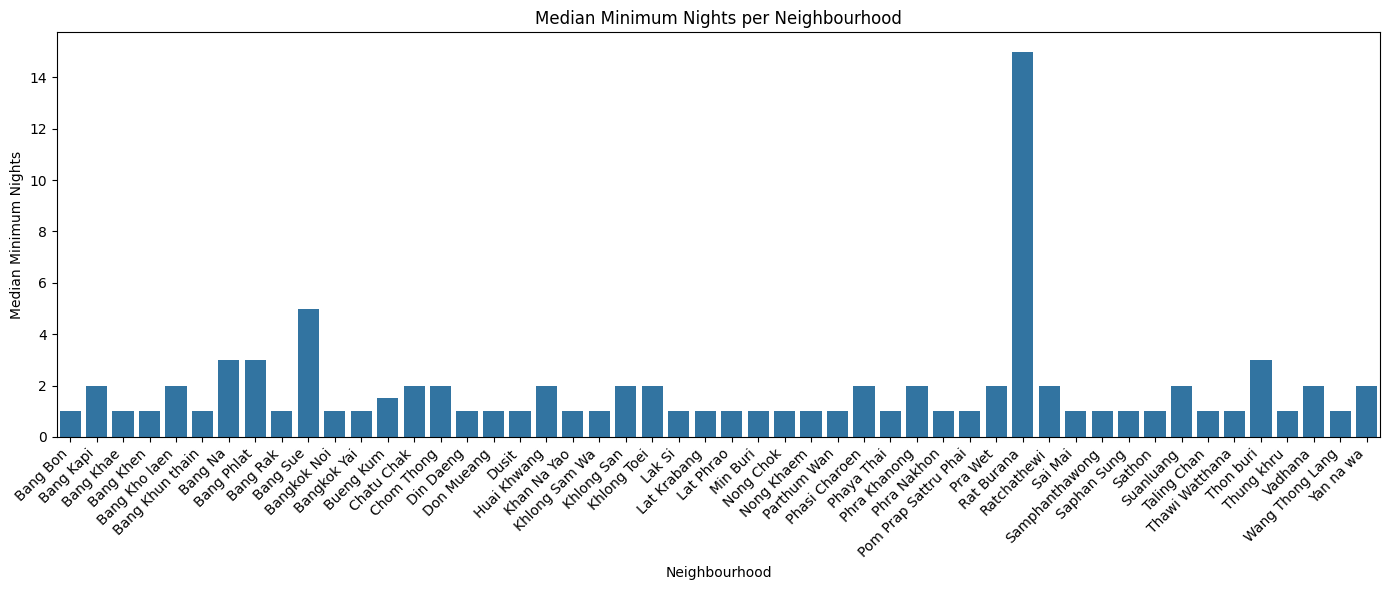

In [48]:
# Barchart of minimum nights per neighbourhood
plt.figure(figsize=(14, 6))
sns.barplot(data=df_minimum_nights_median, x='neighbourhood', y='median')

# Customizing
plt.xticks(rotation=45, ha='right')
plt.title('Median Minimum Nights per Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Median Minimum Nights')
plt.tight_layout()
plt.show()


**Insights:**

1. Most neighbourhood fall between the **1 - 3 minimum nights** per booking
2. Rat Burana stands out with a median of **15 minimum nights** per booking followed by Bang Sue with a median of **5 minimum nights** per booking

### Length of Stay Category Ranking per Neighbourhood

In [49]:
df_stay = df.groupby('neighbourhood')['stay'].value_counts().reset_index(name='count')
df_stay = df_stay.sort_values(by='count', ascending=False)

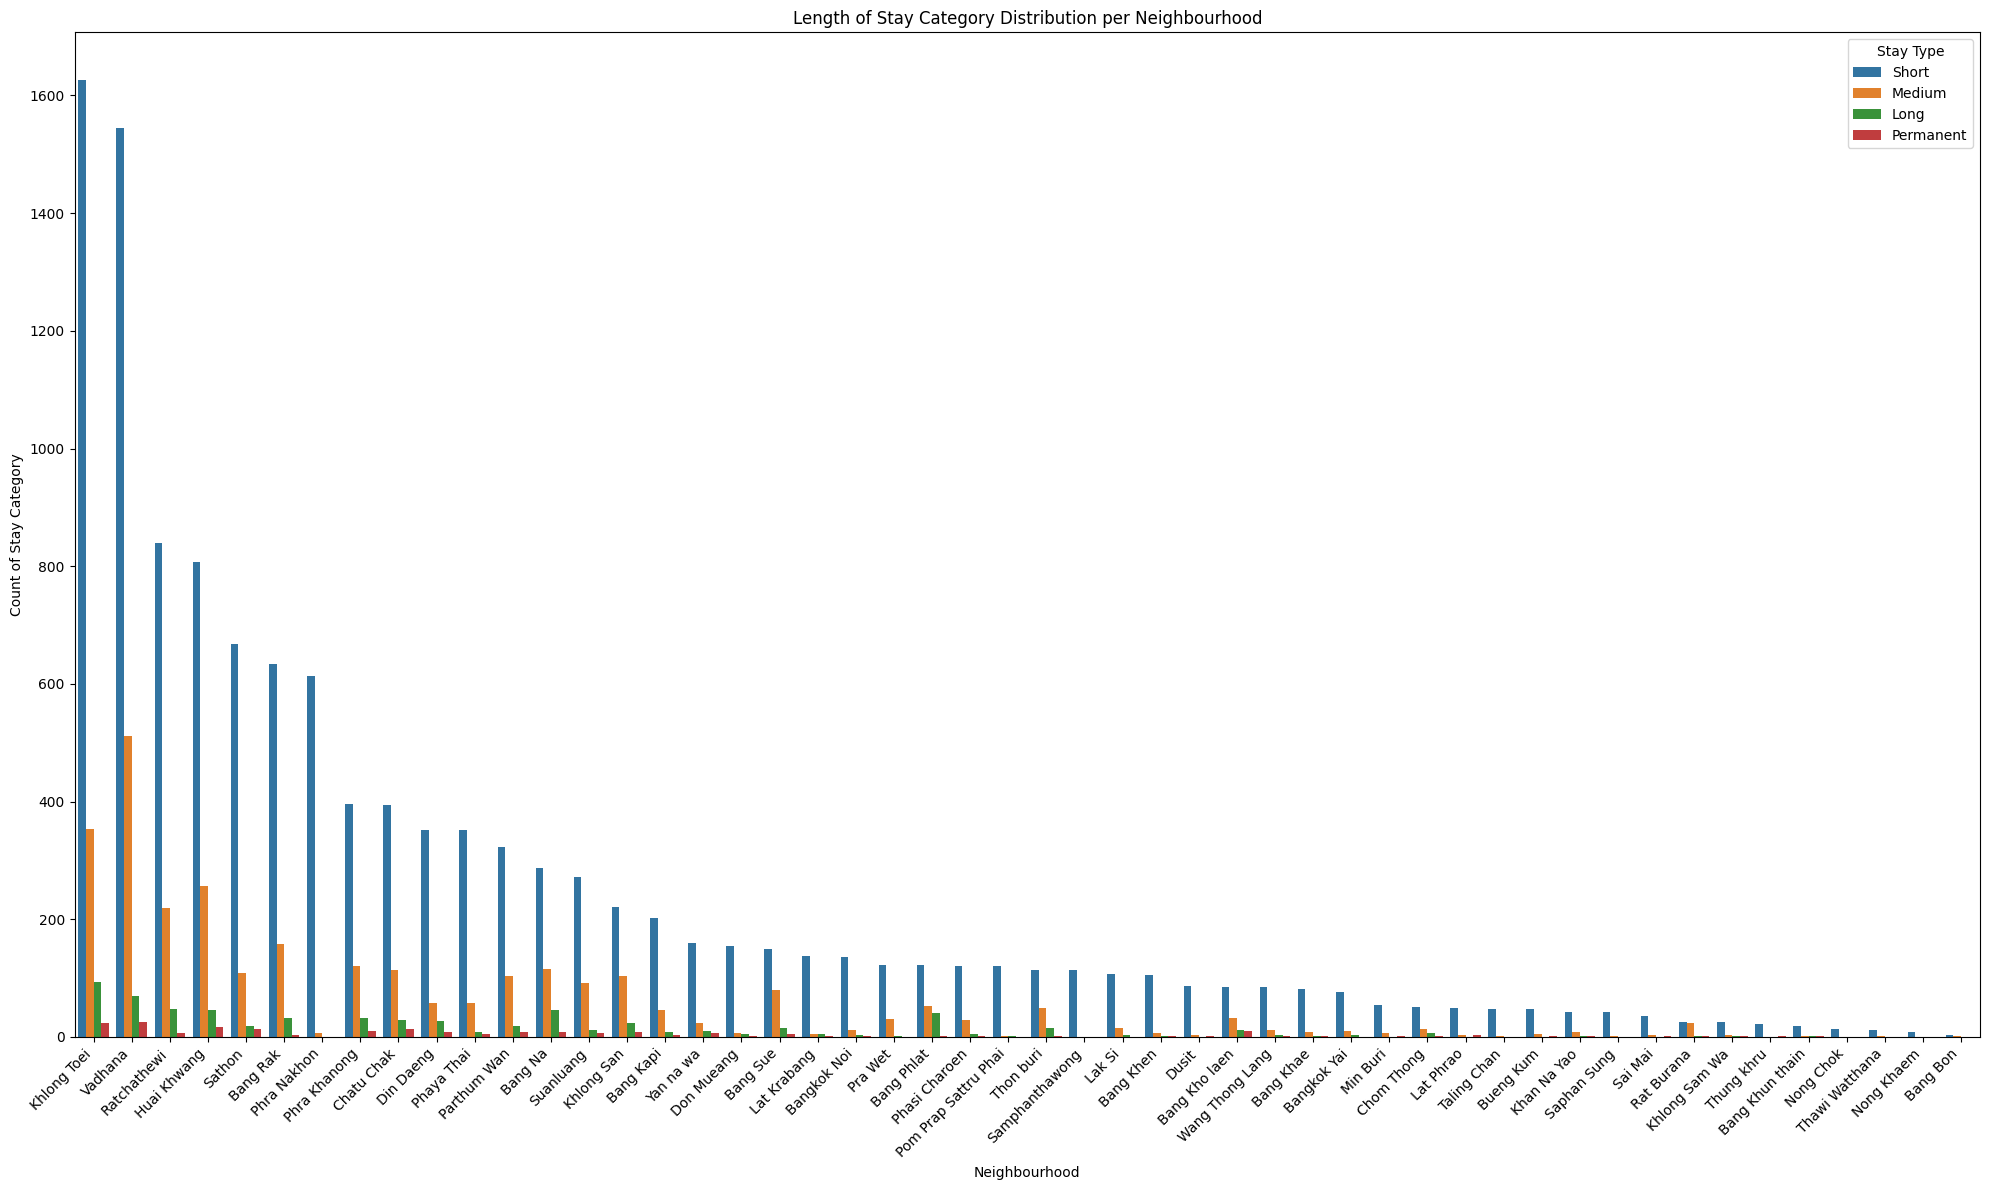

In [50]:
plt.figure(figsize=(20, 12))
sns.barplot(data=df_stay, x='neighbourhood', y='count', hue= 'stay')
plt.title('Length of Stay Category Distribution per Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Count of Stay Category')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Stay Type')
plt.tight_layout()
plt.show()

**Insights:**

Most neighbourhoods are dominated by **short type rooms**(1 - 7 minimum nights)

## Analysis - Competition

4. Large Operator Concentration

  - Where are large-scale operators (50+ properties) located, and are they clustered in high-demand or high-value neighborhoods?

5. Medium Operator Distribution

  - How widespread are medium operators (11–50 properties), and in which neighborhoods are they most active?

6. Competitive Landscape

  - How does the presence of large vs. medium operators vary across Bangkok’s neighborhoods?



### Average number of listing per host per neighbourhood

In [51]:
df_host_listing = df.groupby('neighbourhood')['calculated_host_listings_count'].agg(['mean', 'median', 'min', 'max']).reset_index()
df_host_listing.sort_values(by='median', ascending=False)

neighbourhood       mean  median  min  max
37           Ratchathewi  27.362657     9.0    1  228
41                Sathon  24.922030     9.0    1  228
22           Khlong Toei  20.702432     8.0    1  228
18           Huai Khwang  24.568000     8.0    1  228
8               Bang Rak  17.790810     7.0    1  228
33           Phra Nakhon  14.625202     6.0    1   62
29           Parthum Wan  11.372247     5.0    1   62
34  Pom Prap Sattru Phai  17.756098     5.0    1   89
39        Samphanthawong  15.149123     5.0    1   89
47               Vadhana  11.836355     5.0    1  228
15             Din Daeng   8.709459     4.0    1   48
7             Bang Phlat  12.755760     4.0    1  228
31            Phaya Thai   8.606635     4.0    1   89
17                 Dusit  19.516484     3.0    1   44
32          Phra Khanong   9.965950     3.0    1  228
23                Lak Si   4.785714     3.0    1   34
10           Bangkok Noi   4.671053     3.0    1   20
4          Bang Kho laen  11.257143     3.0    1   41
21            Khlong San   6.028011     3.0    1   37
11           Bangkok Yai   4.722222     2.5    1   30
13            Chatu Chak   4.350365     2.0    1   37
48       Wang Thong Lang   4.570000     2.0    1   49
42             Suanluang   4.293963     2.0    1   40
26              Min Buri   3.580645     2.0    1   12
6                Bang Na   6.109649     2.0    1   48
9               Bang Sue   6.152610     2.0    1   34
2              Bang Khae   4.097826     2.0    1   37
16            Don Mueang   3.245509     2.0    1   22
49             Yan na wa   6.780000     2.0    1   56
24           Lat Krabang   3.409396     2.0    1   20
0               Bang Bon   1.200000     1.0    1    2
1              Bang Kapi   3.511538     1.0    1   40
5        Bang Khun thain   3.380952     1.0    1   30
3              Bang Khen   2.827586     1.0    1   28
14            Chom Thong   2.729730     1.0    1   11
12             Bueng Kum   3.000000     1.0    1   11
30         Phasi Charoen   3.412903     1.0    1   37
28            Nong Khaem   1.777778     1.0    1    6
20         Khlong Sam Wa   3.375000     1.0    1   45
19           Khan Na Yao   2.654545     1.0    1   20
27             Nong Chok   1.285714     1.0    1    2
25             Lat Phrao   2.052632     1.0    1   12
40           Saphan Sung   2.311111     1.0    1   10
38               Sai Mai   2.725000     1.0    1   11
35               Pra Wet   3.198718     1.0    1   21
36            Rat Burana   6.792453     1.0    1   99
45             Thon buri   4.527473     1.0    1   37
44        Thawi Watthana   1.666667     1.0    1    3
43           Taling Chan   1.860000     1.0    1    5
46            Thung khru  30.869565     1.0    1  228

**Insights:**

1. The median of **properties managed by the same host** ranges from **1 - 9 properties per host**

2. The top 5 neighbourhoods with **most properties managed by the same host**	are: Ratchathewi (9 properties per host), Sathon	(9 properties per host), Khlong Toei	(8 properties per host), Huai Khwang (8 properties per host), Bang Rak	(7 properties per host)

### Operator distribution per neighbourhood

In [52]:
# Step 1: Deduplicate to one row per host per neighborhood
df_hosts = df[['host_id', 'neighbourhood', 'calculated_host_listings_count']].drop_duplicates()

# Step 2: add cassify_operator function to each host_id
df_hosts['operators'] = df_hosts['calculated_host_listings_count'].apply(classify_operator)

# Step 3: Count operator types per neighborhood
operator_dist = df_hosts.groupby(['neighbourhood', 'operators']).size().reset_index(name='count')

# (Optional) Step 4: Pivot to wide format
operator_pivot = operator_dist.pivot(index='neighbourhood', columns='operators', values='count').fillna(0)

In [53]:
operator_pivot

operators             Large Operator  Medium Operator  Owner  Small Operator
neighbourhood                                                               
Bang Bon                         0.0              0.0    5.0             0.0
Bang Kapi                        0.0              7.0  159.0            34.0
Bang Khae                        0.0              2.0   50.0             8.0
Bang Khen                        0.0              4.0   76.0            13.0
Bang Kho laen                    0.0              4.0   57.0            13.0
Bang Khun thain                  0.0              2.0   19.0             0.0
Bang Na                          0.0             16.0  229.0            49.0
Bang Phlat                       2.0              9.0   80.0            24.0
Bang Rak                         4.0             27.0  201.0            84.0
Bang Sue                         0.0             10.0  120.0            24.0
Bangkok Noi                      0.0              4.0   62.0            19.0
Bangkok Yai                      0.0              2.0   41.0            11.0
Bueng Kum                        0.0              1.0   37.0             5.0
Chatu Chak                       0.0             14.0  296.0            60.0
Chom Thong                       0.0              1.0   52.0             9.0
Din Daeng                        0.0             30.0  167.0            56.0
Don Mueang                       0.0              2.0   78.0            21.0
Dusit                            0.0              1.0   38.0             5.0
Huai Khwang                      3.0             55.0  365.0            84.0
Khan Na Yao                      0.0              2.0   34.0             9.0
Khlong Sam Wa                    0.0              1.0   20.0             5.0
Khlong San                       0.0             10.0  154.0            46.0
Khlong Toei                      4.0             85.0  525.0           191.0
Lak Si                           0.0              4.0   54.0            15.0
Lat Krabang                      0.0              3.0   75.0            14.0
Lat Phrao                        0.0              1.0   39.0             7.0
Min Buri                         0.0              1.0   33.0             4.0
Nong Chok                        0.0              0.0   12.0             0.0
Nong Khaem                       0.0              0.0    8.0             1.0
Parthum Wan                      1.0             19.0  137.0            66.0
Phasi Charoen                    0.0              3.0  109.0            10.0
Phaya Thai                       1.0             10.0  149.0            44.0
Phra Khanong                     2.0             30.0  253.0            60.0
Phra Nakhon                      2.0              9.0   97.0            72.0
Pom Prap Sattru Phai             1.0              0.0   21.0            20.0
Pra Wet                          0.0              3.0   92.0            17.0
Rat Burana                       1.0              1.0   39.0             2.0
Ratchathewi                      3.0             48.0  229.0           105.0
Sai Mai                          0.0              1.0   31.0             2.0
Samphanthawong                   1.0              3.0   23.0            14.0
Saphan Sung                      0.0              0.0   29.0             6.0
Sathon                           3.0             33.0  155.0            75.0
Suanluang                        0.0              7.0  196.0            52.0
Taling Chan                      0.0              0.0   35.0             3.0
Thawi Watthana                   0.0              0.0    8.0             1.0
Thon buri                        0.0             10.0  104.0            21.0
Thung khru                       1.0              0.0   18.0             0.0
Vadhana                          4.0             78.0  720.0           218.0
Wang Thong Lang                  0.0              3.0   59.0            12.0
Yan na wa                        1.0              4.0  115.0            1

#### Large Operators (properties > 50)

In [54]:
# Show how many neighbourhoods in the dataframe
df['neighbourhood'].nunique()

50

In [55]:
# Show how many large operators operate in each neighbourhood and sort by 'Large Operator'
operator_pivot[['Large Operator']].sort_values(by='Large Operator', ascending=False).head(20)

operators             Large Operator
neighbourhood                       
Bang Rak                         4.0
Khlong Toei                      4.0
Vadhana                          4.0
Ratchathewi                      3.0
Huai Khwang                      3.0
Sathon                           3.0
Phra Nakhon                      2.0
Phra Khanong                     2.0
Bang Phlat                       2.0
Phaya Thai                       1.0
Samphanthawong                   1.0
Yan na wa                        1.0
Parthum Wan                      1.0
Rat Burana                       1.0
Thung khru                       1.0
Pom Prap Sattru Phai             1.0
Bang Kapi                        0.0
Bang Bon                         0.0
Dusit                            0.0
Don Mueang                       0.0

In [56]:
# Step 1: Filter listings managed by Large Operators
large_ops_df = df[df['operators'] == 'Large Operator']

# Step 2: Count listings by neighborhood
listings_by_neighbourhood = (
    large_ops_df['neighbourhood']
    .value_counts()
    .reset_index(name='property_count')
    .sort_values(by='property_count', ascending=False)
)

# Step 3: View top 20 neighborhoods with the most large operator listings
listings_by_neighbourhood.head(20)


neighbourhood  property_count
0            Khlong Toei             108
1            Ratchathewi              94
2               Bang Rak              92
3            Phra Nakhon              90
4            Huai Khwang              72
5                 Sathon              58
6                Vadhana              50
7            Parthum Wan              25
8   Pom Prap Sattru Phai              18
9             Phaya Thai              12
10        Samphanthawong              10
11          Phra Khanong               9
12            Bang Phlat               6
13            Thung khru               3
14            Rat Burana               1
15             Yan na wa               1

**Insights:**

Large operators only operates in **16/50 Neighbourhoods**.

1. Neighbourhoods that have **4 large operators**:
- Bang Rak (92 properties)
- Khlong Toei (108 properties)
- Vadhana (50 properties)

2. Neighbourhoods that have **3 large operators**:
- Ratchathewi (94 properties)
- Huai Khwang (72 properties)
- Sathon (58 properties)

3. Neighbourhoods that have **2 large operators**:
- Phra Nakhon (90 properties)
- Phra Khanong (9 properties)
- Bang Phlat (6 properties)

4. Neighbourhoods that have **1 large operators**:
- Phaya Thai (12 properties)
- Samphanthawong (10 properties)
- Yan na wa (1 properties)
- Parthum Wan (25 properties)
- Rat Burana (1 properties)
- Thung khru (3 properties)
- Pom Prap Sattru Phai (18 properties)

#### Medium Operators (50 - 11 properties)


In [57]:
# Show how many medium operators operate in each neighbourhood and sort by 'Medium Operator'

operator_pivot[['Medium Operator']].sort_values(by='Medium Operator', ascending=False).head(5)

operators      Medium Operator
neighbourhood                 
Khlong Toei               85.0
Vadhana                   78.0
Huai Khwang               55.0
Ratchathewi               48.0
Sathon                    33.0

**Insights:**

- **Medium operators** operates in **42/50 neighbourhoods**. The top 5 neighbourhoods with **most amount of operators** are:
1. Khlong Toei (85 operators)
2. Vadhana	(78 operators)
3. Huai Khwang	(55 operators)
4. Ratchathewi	(48 operators)
5. Sathon	(33 operators)

In [58]:
# Step 1: Filter listings managed by Large Operators
medium_ops_df = df[df['operators'] == 'Medium Operator']

# Step 2: Count listings by neighborhood
listings_by_neighbourhood = (
    medium_ops_df['neighbourhood']
    .value_counts()
    .reset_index(name='property_count')
    .sort_values(by='property_count', ascending=False)
)

# Step 3: View top 20 neighborhoods with the most large operator listings
listings_by_neighbourhood.head(20)


neighbourhood  property_count
0      Khlong Toei             836
1          Vadhana             634
2      Huai Khwang             443
3      Ratchathewi             379
4           Sathon             328
5         Bang Rak             177
6     Phra Khanong             127
7      Parthum Wan             107
8        Din Daeng              98
9       Phaya Thai              90
10     Phra Nakhon              84
11         Bang Na              74
12      Chatu Chak              63
13      Bang Phlat              62
14        Bang Sue              51
15      Khlong San              49
16   Bang Kho laen              42
17           Dusit              38
18  Samphanthawong              32
19       Yan na wa              30

**Insights:**

- The top 5 neighbourhoods with **most properties managed by Medium operators** are:

1. Khlong Toei (836 properties)
2. Vadhana	(634 properties)
3. Huai Khwang	(443 properties)
4. Ratchathewi	(379 properties)
5. Sathon	(328 properties)

## Analysis - Price

7. Price Distribution Across Neighborhoods

  - Which neighborhoods command the highest median prices?

  - Which neighborhoods have the lowest median prices?

  - How wide is the overall price range across Bangkok neighborhoods?

8. Price by Room Type

  - How do median prices vary between different room types?

  - Which room types are typically the most expensive, and which are the cheapest?

  - Are there statistically significant differences in prices between room types?

9. Neighborhood & Room Type Interaction

  - How do prices for each room type vary by neighborhood?

  - Which neighborhoods have unusually high or low prices for specific room types?

  - Are there extreme price outliers that may skew perceptions or indicate niche luxury/low-cost markets?

10. Strategic Pricing Opportunities

  - In which neighborhoods can certain room types command premium prices?

### Median room price by neighbourhood (Top 5 and Bottom 5)

/tmp/ipython-input-2668769158.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_bottom, x='neighbourhood', y='price', palette='coolwarm')
/tmp/ipython-input-2668769158.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_bottom, x='neighbourhood', y='price', palette='coolwarm')


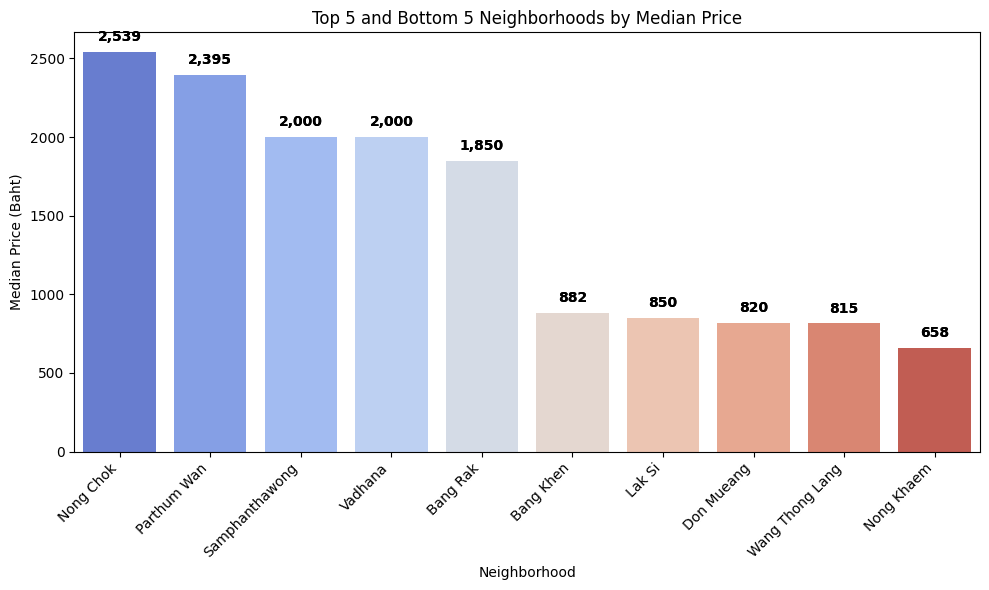

In [59]:
# Calculate median price by neighborhood
median_price_by_neighborhood = df.groupby('neighbourhood')['price'].median().reset_index()

# Sort by price
median_price_by_neighborhood = median_price_by_neighborhood.sort_values(by='price', ascending=False)

# Select top 3 and bottom 3
top_bottom = pd.concat([
   median_price_by_neighborhood.head(5),
    median_price_by_neighborhood.tail(5)
])

# Set plot size
plt.figure(figsize=(10, 6))

# Barplot
sns.barplot(data=top_bottom, x='neighbourhood', y='price', palette='coolwarm')

ax = sns.barplot(data=top_bottom, x='neighbourhood', y='price', palette='coolwarm')

# Add value labels on top of each bar
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 50,  # adjust the offset above the bar
        f'{height:,.0f}',  # formatted with commas and no decimal
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

# Customize labels and title
plt.title('Top 5 and Bottom 5 Neighborhoods by Median Price')
plt.xlabel('Neighborhood')
plt.ylabel('Median Price (Baht)')
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()

**Insights:**

Top 5 Neighbourhood by **median** prices:
1. **Nong Chok**(฿ 2539)
2. **Parthumwan**(฿ 2395)
3. **Samphanthawong**(฿ 2000)
4. **Vadhana** (฿ 2000)
5. **Bang Rak** (฿ 1850)

Bottom 5 Neighbourhood by **median** prices:
1. **Nong Khaem**(฿ 658)
2. **Wang Thong Lang**(฿ 815)
3. **Don Mueang**(฿ 820)
4. **Lak Si**(฿ 850)
5. **Bang Khen**(฿ 882)

### Median room price by neighbourhood (All)

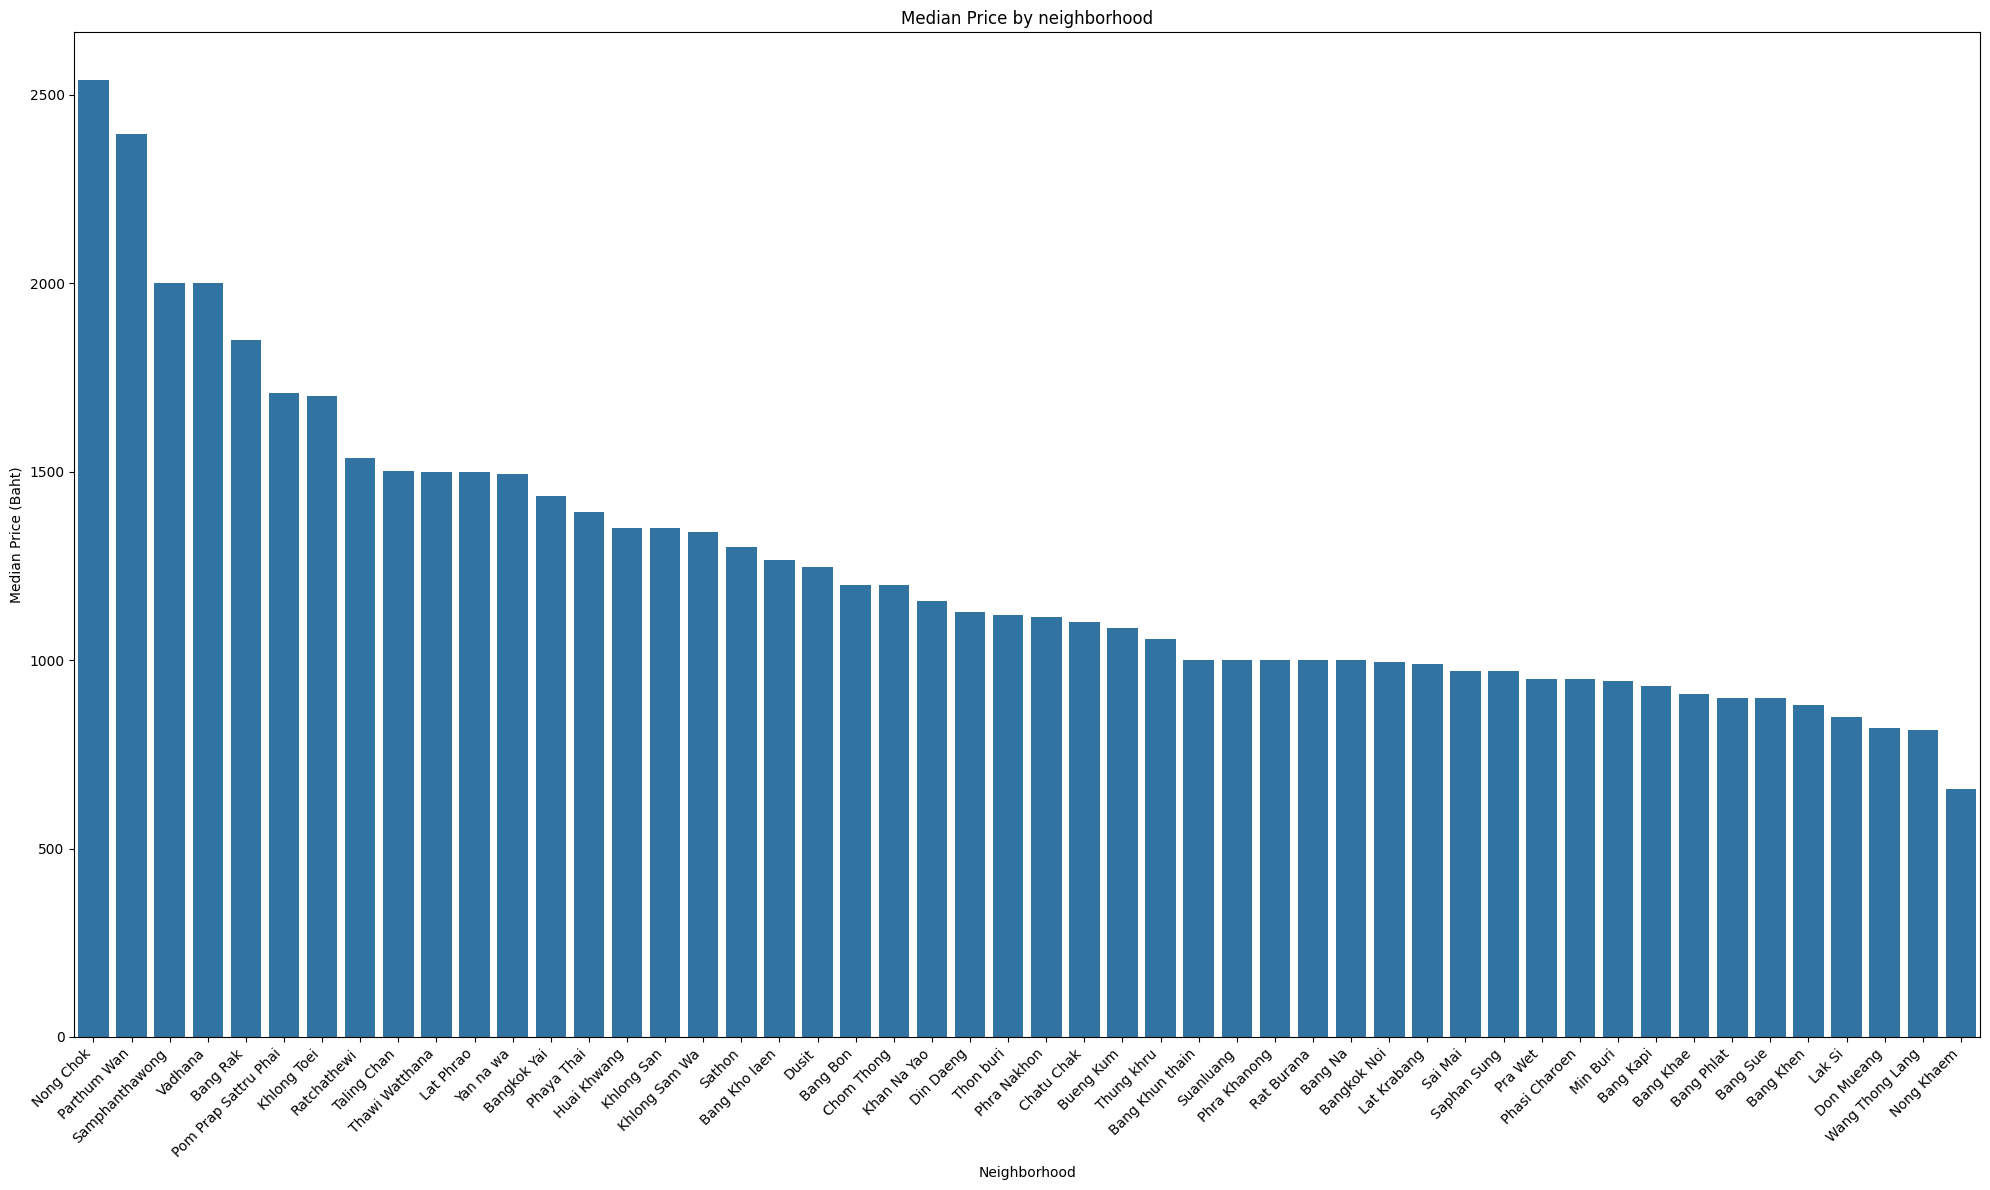

In [60]:
plt.figure(figsize=(20, 12))

sns.barplot(data=median_price_by_neighborhood, x='neighbourhood', y='price')


plt.title('Median Price by neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Median Price (Baht)')
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()

### Median price by room type

In [61]:
df_room_type = df.groupby('room_type')['price'].agg(['median']).reset_index()
df_room_type = df_room_type.rename(columns={'median': 'median_price'})
df_room_type = df_room_type.sort_values(by='median_price', ascending=False)
df_room_type

room_type  median_price
1       Hotel room        1700.0
0  Entire home/apt        1536.0
2     Private room        1212.0
3      Shared room         500.0

/tmp/ipython-input-329361662.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Room Type')


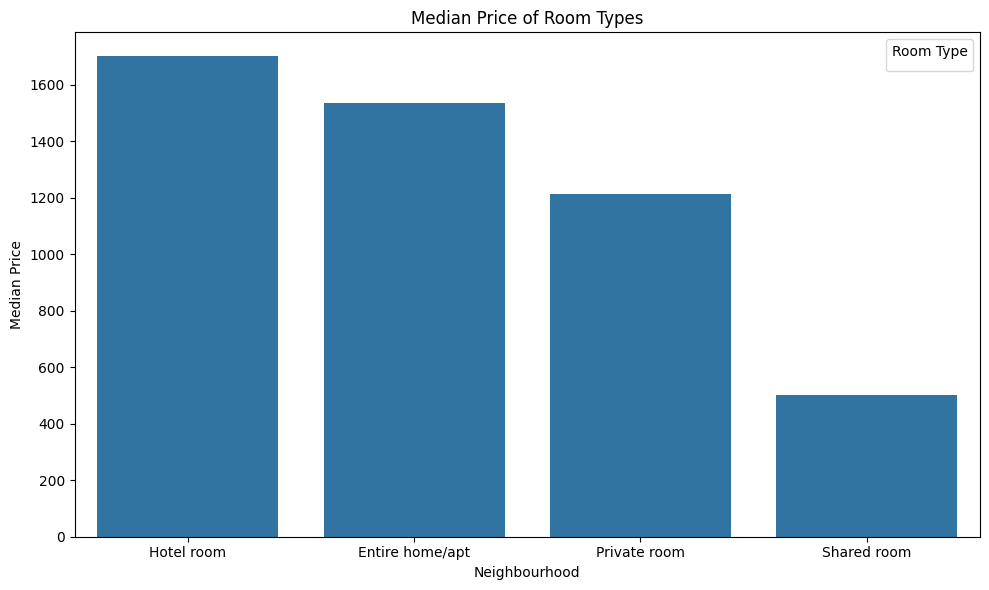

In [62]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_room_type, x='room_type', y='median_price')
plt.title('Median Price of Room Types')
plt.xlabel('Neighbourhood')
plt.ylabel('Median Price')
plt.xticks(rotation=0)
plt.legend(title='Room Type')
plt.tight_layout()
plt.show()

**Insights:**

Ranking of median prices:
1.  **hotel rooms** (฿ 1700)
2. **entire home/apt** (฿ 1536),
3. **private room** (฿ 1212)
4. **shared room** (฿ 500)

### Quartile 1 and Quartile 3 Prices of room types to check price ranges of rooms

In [97]:
quartiles_price = df.groupby('room_type')['price'].quantile([0.25, 0.75]).reset_index()
quartiles_price.columns = ['room_type', 'quartiles', 'price']
quartiles_price

room_type  quartiles    price
0  Entire home/apt       0.25  1028.50
1  Entire home/apt       0.75  2571.00
2       Hotel room       0.25   995.75
3       Hotel room       0.75  3170.75
4     Private room       0.25   800.00
5     Private room       0.75  2090.00
6      Shared room       0.25   390.00
7      Shared room       0.75   650.00

**Insights:**

1. Entire home/apt

  - Q1 (25th percentile): ~฿1,029

  - Q3 (75th percentile): ~฿2,571

- Interpretation: The middle 50% of entire homes are priced between ~1,000 and ~2,600.
This shows a broad mid-range market where travelers can find both budget-friendly and premium entire homes.
---

2. Hotel room

  - Q1: ~฿996

  - Q3: ~฿3,171

- Interpretation: Hotel rooms have the widest spread of prices among all categories.
The Q3 is higher than for entire homes, suggesting that premium/luxury hotels significantly pull up prices.
---

3. Private room

  - Q1: ~฿800

  - Q3: ~฿2,090

- Interpretation: Private rooms span a wide range, but the lower quartile starts cheaper than entire homes.
Still, the upper quartile approaches entry-level entire homes, which may reduce their competitiveness for travelers seeking privacy.
---

4. Shared room

  - Q1: ~฿390

  - Q3: ~฿650

- Interpretation: Shared rooms are consistently the lowest-priced option.
The interquartile range (IQR) is very narrow (~260), meaning price variation is limited, and competition is primarily cost-driven rather than value-added.


### Median price of room types by neighbourhood

In [63]:
# Group by neighbourhood and room type, then get median price
df_room_price_neighbourhood = (df.groupby(['neighbourhood', 'room_type'])['price'].agg(median_price='median').reset_index())

# Sort by median price
df_room_price_neighbourhood = df_room_price_neighbourhood.sort_values(by='median_price', ascending=False)

df_room_price_neighbourhood


neighbourhood    room_type  median_price
165        Yan na wa   Hotel room        7943.0
14     Bang Kho laen   Hotel room        7765.0
18   Bang Khun thain  Shared room        7276.0
87         Lat Phrao  Shared room        5000.0
45        Chatu Chak   Hotel room        4944.5
..               ...          ...           ...
58        Don Mueang  Shared room         384.0
65       Huai Khwang  Shared room         350.0
5          Bang Kapi  Shared room         346.0
154        Thon buri  Shared room         320.0
137      Saphan Sung  Shared room         313.0

[168 rows x 3 columns]

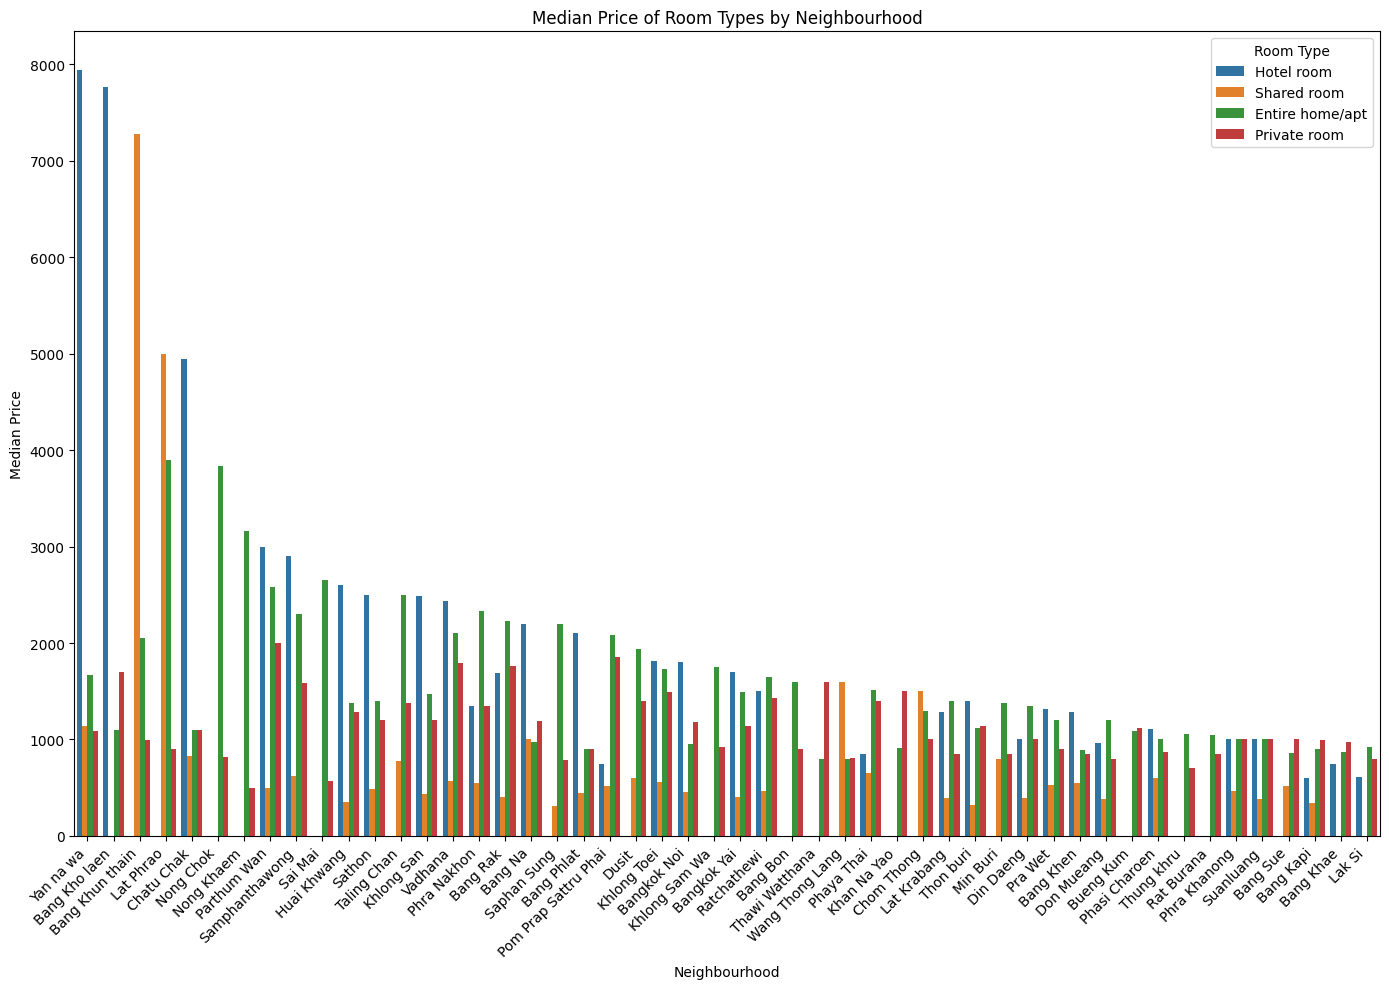

In [64]:
plt.figure(figsize=(14, 10))
sns.barplot(data=df_room_price_neighbourhood, x='neighbourhood', y='median_price', hue='room_type')
plt.title('Median Price of Room Types by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Median Price')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Room Type')
plt.tight_layout()
plt.show()

**Insights:**

1. **Entire home/apt:** The median price for most neighbourhood fall between **฿ 1000 to ฿ 2500** with **Lat Phrao** (฿ 4000), **Nong Chok** (฿ 3800), and **Nong Khaem** (฿ 3300) being the outlier by a small margin.

2. **Private room:** The median price for most neighbourhood fall between **฿ 800 to ฿ 2000**.

3. **Hotel room:** The median price for most neighbourhood fall between **฿ 500  and ฿ 3000** with **Bang Kho laen** (฿ 7800), **Yan na wa** (฿ 7800), and **Chatu Chak** (฿ 5000) being the **outlier** by a **very high margin**.

4. **Shared Room:** The median price for most neighbourhood fall between **฿ 500 to ฿ 1500** with **Bang Khun thain** (฿ 7200) and **Lat Phrao** (฿ 5000) being the **outlier** by a **very high margin**.

5. **Hotel rooms** seems to always be the **most expensive** or **second most expensive** room type of every neighbourhood.

6. **Shared rooms** seems to always be the **least expensive** room type of every neighbourhood.

### Statistical test of median prices for each room types (Kruskal - Wallis H-test)
Kruskal - Wallis H-test is used due to a comparison of median prices from multiple room types. Since the distribution of  price data is skewed, non-parametrical test and median is used.

- H0: The median prices are the same across all room types.
- H1: At least one room type has a different median price compared to at least one other room type.

In [65]:
from scipy.stats import kruskal

# Prepare data for each room type
groups = [g['price'].values for _, g in df.groupby('room_type')]

# Kruskal-Wallis test
stat, p = kruskal(*groups)

print(f"Kruskal-Wallis H-statistic: {stat:.3f}, p-value: {p:.4f}")

# Interpretation
if p < 0.05:
    print("There is a statistically significant difference in median prices between at least two room types.")
else:
    print("No significant difference detected.")

Kruskal-Wallis H-statistic: 1190.708, p-value: 0.0000
There is a statistically significant difference in median prices between at least two room types.


**Insights:**

There is a statistically significant difference in median prices between at lesat two room types; this suggests that the ranking of median price is most likely accurate. (Reject H0)

## Analysis - Demand
- Which room types have the highest demand (total/last twelve months)?

- Which neighbourhoods have the highest demand (total/last twelve months)?

- Is there a relationship between price and demand?

### Room type ranking by Total Bookings

In [66]:
df_room_type_review = (df.groupby('room_type').agg(total_bookings=('number_of_reviews', 'sum'),ltm_bookings=('number_of_reviews_ltm', 'sum'))).reset_index()

df_room_type_review = df_room_type_review.sort_values(by='total_bookings', ascending=False)
df_room_type_review

room_type  total_bookings  ltm_bookings
0  Entire home/apt          197626         44530
2     Private room           50710          9185
1       Hotel room           12700          1258
3      Shared room            2682           218

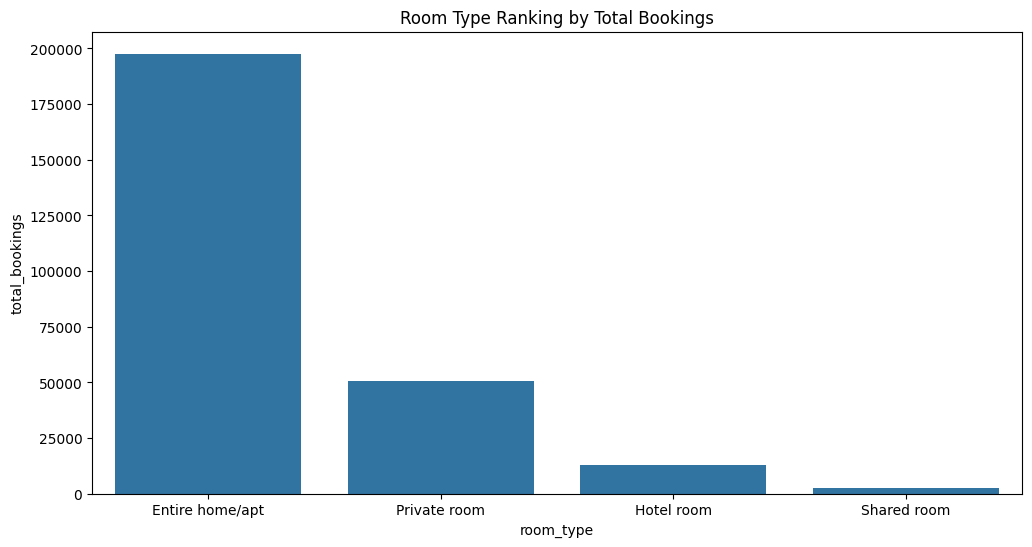

In [67]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_room_type_review.head(10),
            x='room_type', y='total_bookings')
plt.xticks(rotation=0)
plt.title('Room Type Ranking by Total Bookings')
plt.show()

**Insights:**

Room type distribution by highest demand (total booking):
1. Entire home/apt (197626)
2.	Private room (50710)
3.	Hotel room (12700)
4.	Shared room	(2682)

### Room type ranking by LTM Bookings

In [68]:
df_room_type_review = (df.groupby('room_type').agg(total_bookings=('number_of_reviews', 'sum'),ltm_bookings=('number_of_reviews_ltm', 'sum'))).reset_index()

df_room_type_review = df_room_type_review.sort_values(by='ltm_bookings', ascending=False)
df_room_type_review

room_type  total_bookings  ltm_bookings
0  Entire home/apt          197626         44530
2     Private room           50710          9185
1       Hotel room           12700          1258
3      Shared room            2682           218

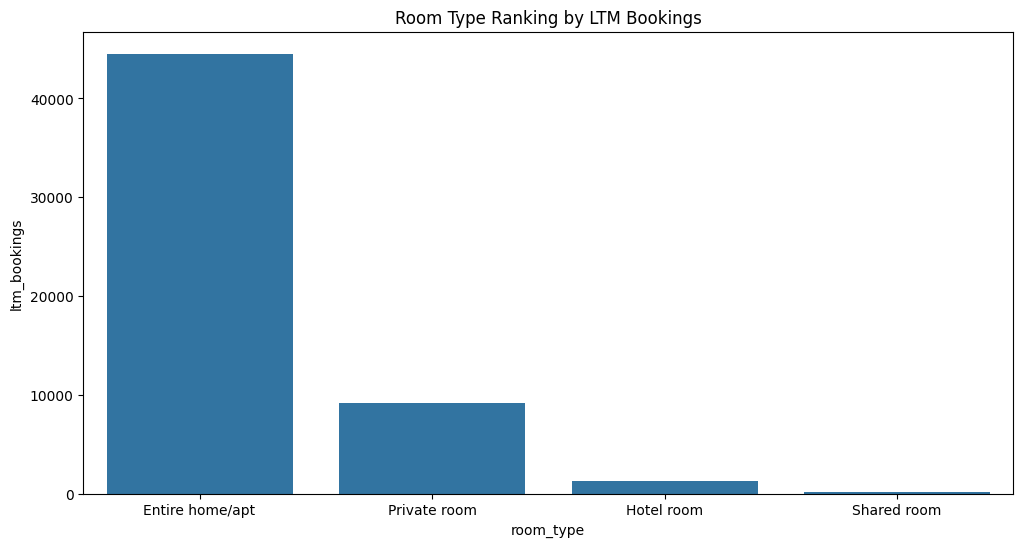

In [69]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_room_type_review.head(10),
            x='room_type', y='ltm_bookings')
plt.xticks(rotation=0)
plt.title('Room Type Ranking by LTM Bookings')
plt.show()

**Insights:**

Room type distribution by **bookings from the last twelve months**:
1. Entire home/apt (44530)
2.	Private room (9185)
3.	Hotel room (1258)
4.	Shared room	(218)

### Neighbourhood ranking by Total Bookings

In [70]:
df_neighbourhood_booking = (df.groupby('neighbourhood').agg(total_bookings=('number_of_reviews', 'sum'),ltm_bookings=('number_of_reviews_ltm', 'sum'))).reset_index()
df_neighbourhood_booking = df_neighbourhood_booking.sort_values(by='total_bookings', ascending=False)
df_neighbourhood_booking[['neighbourhood','total_bookings']].head(5)

neighbourhood  total_bookings
22   Khlong Toei           41281
47       Vadhana           37415
41        Sathon           22240
37   Ratchathewi           20698
18   Huai Khwang           18145

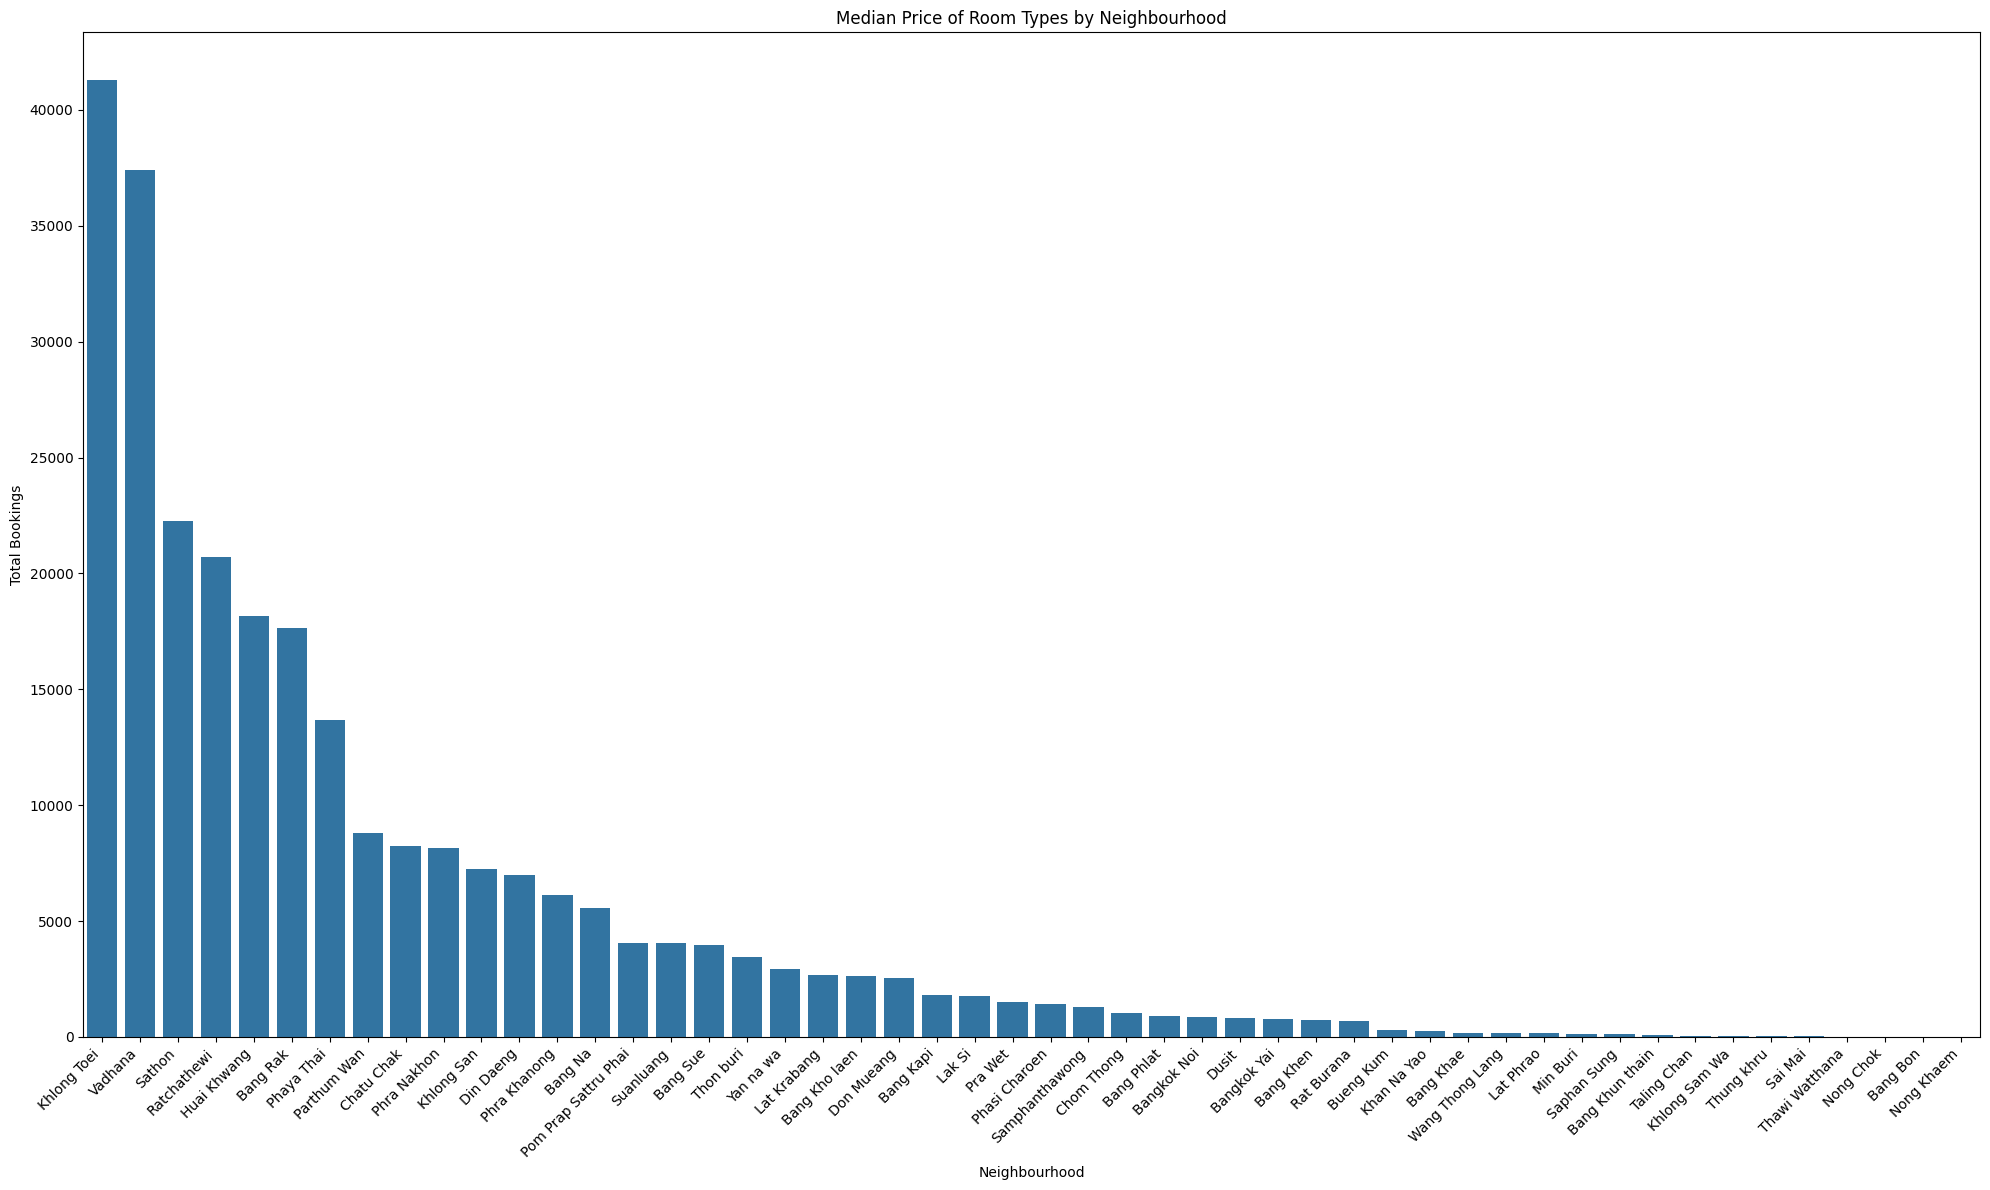

In [71]:
plt.figure(figsize=(20, 12))
sns.barplot(data=df_neighbourhood_booking, x='neighbourhood', y='total_bookings')
plt.title('Median Price of Room Types by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Total Bookings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Insights:**

Top 5 Neighbourhood Ranking by Total Bookings
1. Khlong Toei (41281)
2. Vadhana (37415)
3. Sathon (22240)
4. Ratchathewi (20698)
5. Huai Khwang (18145)

### Neighbourhood ranking by LTM Bookings

In [72]:
df_neighbourhood_booking = df_neighbourhood_booking.sort_values(by='ltm_bookings', ascending=False)
df_neighbourhood_booking[['neighbourhood','ltm_bookings']].head(5)

neighbourhood  ltm_bookings
22   Khlong Toei         13601
47       Vadhana          9709
37   Ratchathewi          4455
8       Bang Rak          3420
41        Sathon          3232

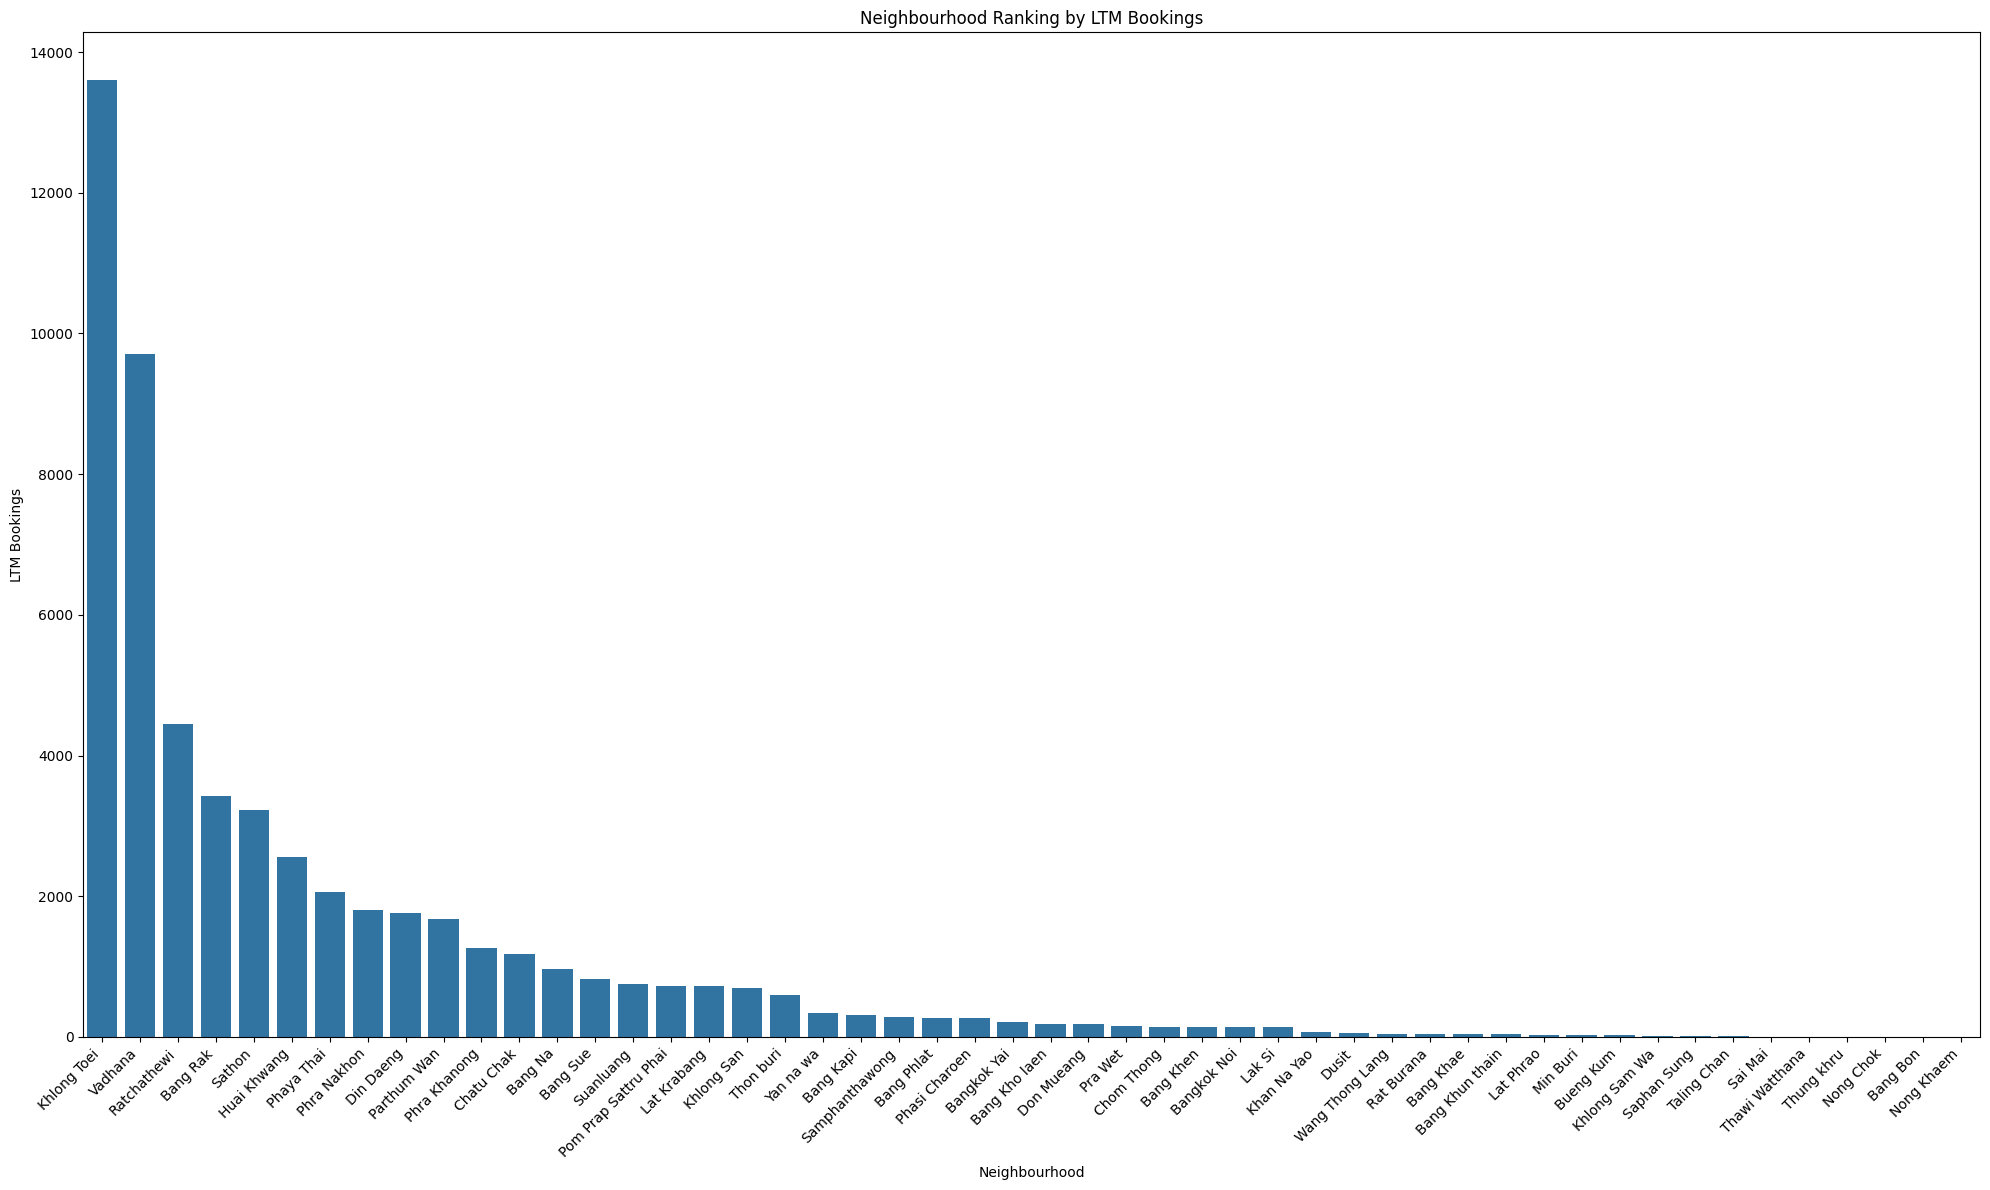

In [73]:
plt.figure(figsize=(20, 12))
sns.barplot(data=df_neighbourhood_booking, x='neighbourhood', y='ltm_bookings')
plt.title('Neighbourhood Ranking by LTM Bookings')
plt.xlabel('Neighbourhood')
plt.ylabel('LTM Bookings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Insights:**

Top 5 Neighbourhood Ranking by **bookings in the last twelve months**:
1. Khlong Toei (13601)
2. Vadhana (9709)
3. Ratchathewi (4455)
4. Bang Rak (3420)
5. Sathon	(3232)

### Price vs Number of Reviews

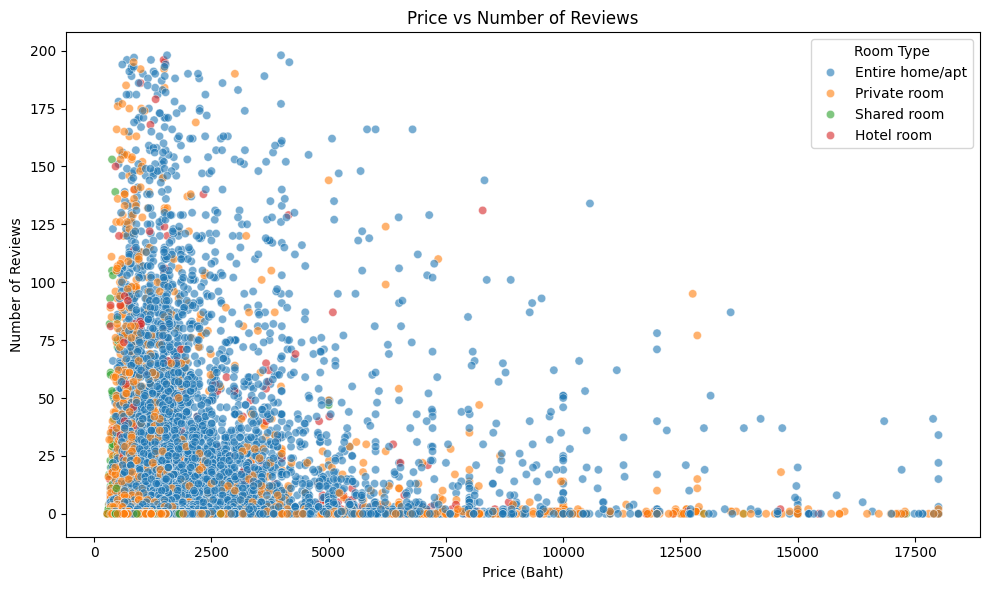

In [74]:
df_price_filter = df[(df['price'] <= df['price'].quantile(0.99)) &
                 (df['number_of_reviews'] <= df['number_of_reviews'].quantile(0.99))]

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_price_filter,
    x='price',
    y='number_of_reviews',
    hue='room_type',
    alpha=0.6
)

plt.title('Price vs Number of Reviews')
plt.xlabel('Price (Baht)')
plt.ylabel('Number of Reviews')
plt.legend(title='Room Type')
plt.tight_layout()
plt.show()

**Insights:**

1. There’s a very dense cluster in the lower-left (prices under ~฿3000 , reviews under ~50), suggesting that the bulk of the market is in the budget–mid range.

2. A few listings with very high prices (> ฿ 10,000 ) have very few reviews, implying low demand at that price point.

3. The upper band of reviews (150–200) is almost entirely concentrated in low-price properties.

In [75]:
corr = df['price'].corr(df['number_of_reviews'])
print(f"Correlation between price and number_of_reviews: {corr:.4f}")


Correlation between price and number_of_reviews: -0.0044


**Insights:**

1. Just increasing or decreasing price alone does not explain changes in demand.

2. Demand might be driven more by other factors — location (neighbourhood), room type, seasonality, etc.

3. It’s possible that the relationship is non-linear or masked by confounding variables. For example, budget listings might get high demand in some neighborhoods, but not in others.

### Median prices of each room type by neighbourhood (listing must have atleast 50 bookings)

In [76]:
# Filter listings with at least 50 bookings
df_high_demand = df[df['number_of_reviews'] >= 50]

# Group by neighbourhood & room_type, then calculate average price
avg_price_by_segment = (df_high_demand.groupby(['neighbourhood', 'room_type']).agg(median_price=('price','median')).reset_index().sort_values(by='median_price', ascending=False))

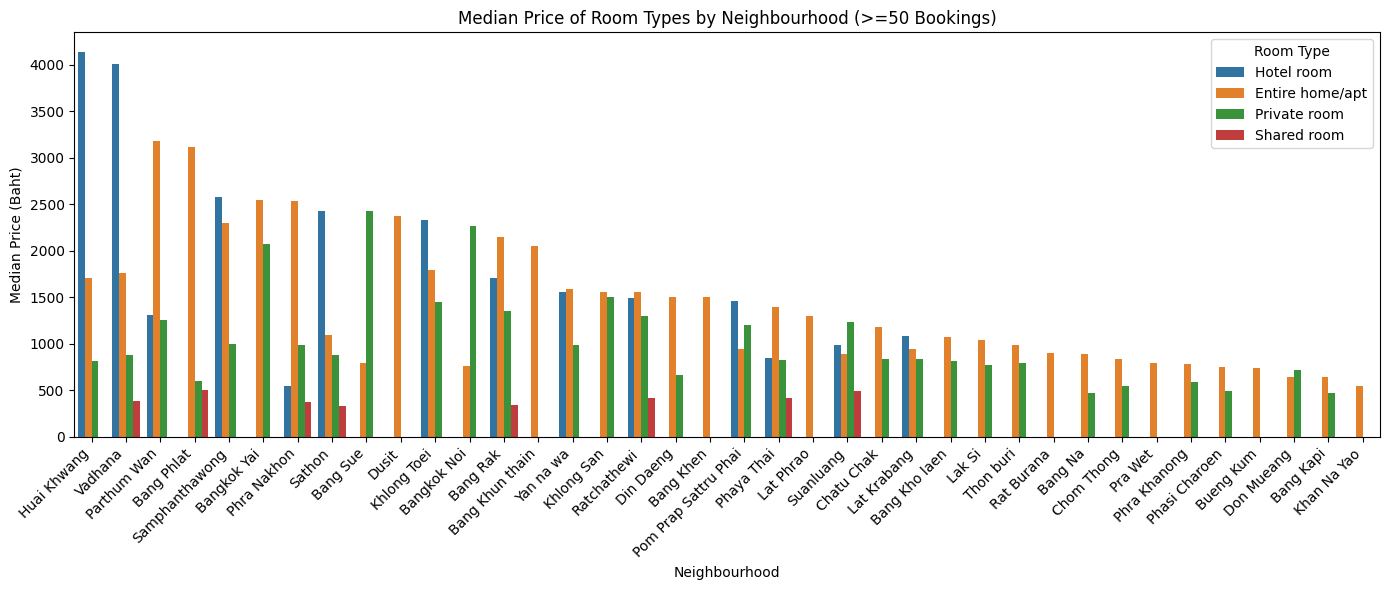

In [77]:
plt.figure(figsize=(14, 6))
sns.barplot(data=avg_price_by_segment,
            x='neighbourhood', y='median_price', hue='room_type')
plt.xticks(rotation=45, ha='right')
plt.title('Median Price of Room Types by Neighbourhood (>=50 Bookings)')
plt.ylabel('Median Price (Baht)')
plt.xlabel('Neighbourhood')
plt.legend(title='Room Type')
plt.tight_layout()
plt.show()

**Insights:**

1. Hotel Rooms
  - **Huai Khwang** and **Vadhana** command the **highest median prices** (above ฿4,000) while still having >=50 bookings — showing **strong willingness to pay** in these areas.

  - **Parthum Wan** and **Bang Phlat** also achieve premium pricing (฿2,500–฿3,000+).

  - In **most neighbourhoods**, **hotel rooms remain the highest-priced segment**, making them ideal for luxury positioning and premium services.

2. Entire Home/Apt
  - **Parthum Wan** and **Bang Phlat** lead with prices above ฿3,000.

  - **Huai Khwang**, **Samphanthawong**, **Bangkok Yai** are also above the ฿2,500 range, suggesting strong market acceptance for premium entire units in these districts.

  - **Across many neighbourhoods**, **this category has a wide price spread**, meaning location and property quality heavily influence price.

3. Private Rooms
  - **Bangkok Yai** and **Bang Sue** **stand out with median prices** in the **฿2,000–฿2,500 range**, well **above the typical ฿800–฿1,500** seen in most neighbourhoods.

  - **Parthum Wan** and **Bang Phla**t also sustain **relatively high private room price** while keeping demand strong.

4. Shared Rooms
  - **Most neighbourhoods** price shared rooms in the ฿500–฿700 range, but **Huai Khwang** and **Bang Khun Thian** show **significantly higher rates**.

  - In lower-priced neighbourhoods, shared rooms may cater to budget backpackers, while in higher-priced ones, they may be targeted at short-term co-living or niche stays.

### Statistical test of median prices for each room types (listing must have atleast 50 bookings) (Kruskal - Wallis H-test)
Kruskal - Wallis H-test is used due to a comparison of median prices from multiple room types. Since the distribution of  price data is skewed, non-parametrical test and median is used.

- H0: There is no difference in the median prices among the different room types.
- H1: At least one room type has a different median price compared to the others.

In [78]:
# Prepare data for each room type
groups = []
for room in df_high_demand['room_type'].unique():
    prices = df_high_demand.loc[df_high_demand['room_type'] == room, 'price']
    groups.append(prices)

# Kruskal-Wallis test
stat, p = kruskal(*groups)

print(f"Kruskal-Wallis H-statistic: {stat:.4f}")
print(f"P-value: {p:.4f}")

# Interpretation
if p < 0.05:
    print("Result: Statistically significant difference in median prices among room types.")
else:
    print("Result: No statistically significant difference in median prices among room types.")

Kruskal-Wallis H-statistic: 165.6404
P-value: 0.0000
Result: Statistically significant difference in median prices among room types.


**Insights:**

This means that in the high-demand segment, room type is a key factor influencing pricing — the variation in median prices is not due to random chance. (Reject H0)

### Wordcloud analysis for each room type (High demand listings only)

#### Entire home/apt

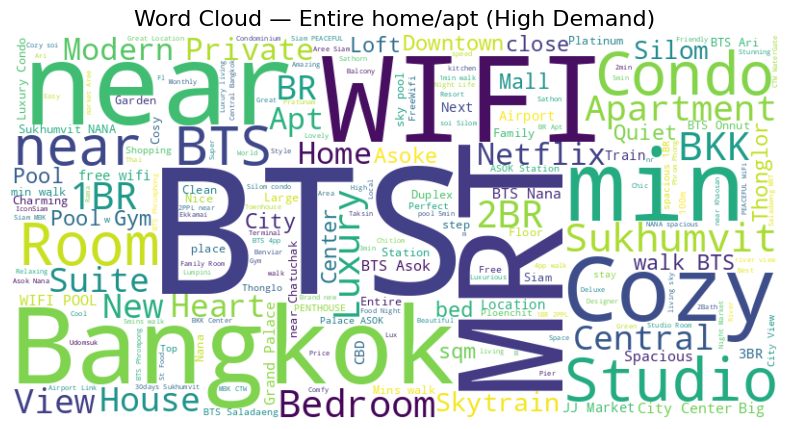

In [79]:
# Entire home/apt
subset_entire = df_high_demand.loc[df_high_demand['room_type'] == 'Entire home/apt', 'name']
wordcloud_entire = WordCloud(width=800, height=400, background_color='white').generate(' '.join(subset_entire))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_entire, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud — Entire home/apt (High Demand)', fontsize=16)
plt.show()

**Insights:**

1. Location Proximity is a Major Selling Point

  - Frequent mentions of "BTS", "MRT", "Sukhumvit", "Asok", "Central", "Downtown", and "Near" show that high-demand listings emphasize closeness to public transport and key areas.

  - This indicates that ease of mobility is one of the most attractive factors for guests.

2. Amenities are Highlighted

  - Words like "WIFI", "Netflix", "Pool", "Gym", and "Suite" suggest that convenience and in-room entertainment are promoted heavily.

  - Amenities likely play a role in converting interest into bookings.

3. Property Type & Style Appeal

  - Frequent terms: "Condo", "Apartment", "Studio", "Loft", "Penthouse", and "Modern" reflect a trend toward urban, stylish living spaces.

  - The use of "Luxury" and "Deluxe" suggests a push toward upscale positioning.

4. Size & Comfort Messaging

  - Words like "2BR", "3BR", "Spacious", "Cozy", "Quiet" show hosts emphasizing both functional size and atmosphere.

  - This caters to different segments — families needing space, and solo/couple travelers looking for comfort.

#### Private room

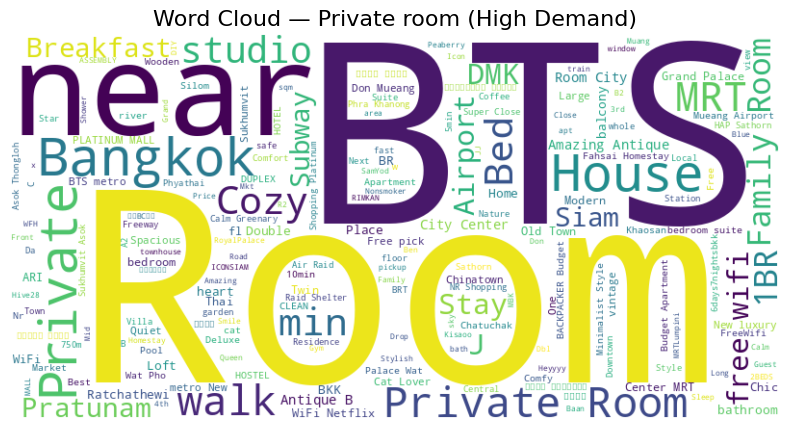

In [80]:
# Private room
subset_private = df_high_demand.loc[df_high_demand['room_type'] == 'Private room', 'name']
wordcloud_private = WordCloud(width=800, height=400, background_color='white').generate(' '.join(subset_private))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_private, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud — Private room (High Demand)', fontsize=16)
plt.show()


**Insights:**

1. Proximity to Public Transport is Critical

  - Dominant mentions of "near", "BTS", "MRT", "Subway", and "walk" reinforce that easy access to transportation is a top selling point for high-demand private rooms.

2. City Branding in Titles

  - Frequent use of "Bangkok", "Siam", "Old Town", and "City Center" suggests that hosts leverage recognizable and appealing location names to attract bookings.

3. Emphasis on Room Privacy & Comfort

  - Keywords like "Private", "Room", "House", "Loft", and "Balcony" highlight that privacy and home-like features are important even in private room setups.

4. Amenities & Lifestyle Features

  - Common mentions of "WiFi", "Free WiFi", "Netflix", "Breakfast", and "Kitchen" show that including basic conveniences and extra perks increases listing appeal.

5. Atmosphere & Experience-Oriented Language

  - Words like "Cozy", "Vintage", "Chic", "Antique", and "Family" reflect attempts to differentiate listings through style, charm, and target audience focus (e.g., families, budget travelers, solo explorers).

6. Time & Distance Promises

  - Phrases like "10 min", "1 min", "750m", and "walk to" show that specific proximity claims are used as persuasive hooks.

#### Hotel room

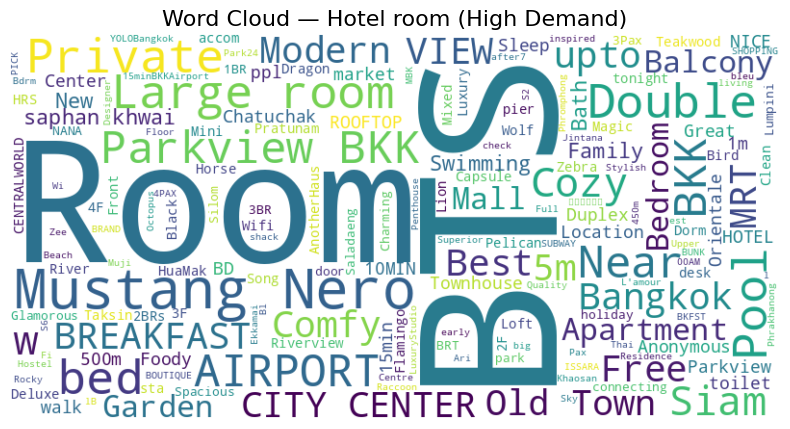

In [81]:
# Hotel room
subset_hotel = df_high_demand.loc[df_high_demand['room_type'] == 'Hotel room', 'name']
wordcloud_hotel = WordCloud(width=800, height=400, background_color='white').generate(' '.join(subset_hotel))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_hotel, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud — Hotel room (High Demand)', fontsize=16)
plt.show()

**Insights:**

1. Transport Accessibility is a Strong Draw

  - Large mentions of "BTS", "Near", and "MRT" emphasize that high-demand hotel rooms often promote their proximity to public transportation.

2. Room Type & Bed Configuration are Highlighted

  - Keywords like "Double", "Private", "Large room", "Dorm", and "Studio" show that specifying room size and bed type is important to set guest expectations.

3. Leisure Amenities are Key Selling Points

  - The prominence of "Pool", "Parkview", "Garden", "Rooftop", and "View" reflects the role of lifestyle and relaxation facilities in attracting bookings.

4. Unique & Brand-Like Names Stand Out

  - Words like "Mustang", "Nero", "Zebra", and "Flamingo" suggest that distinctive property names or thematic branding may help differentiate hotel listings from generic ones.

5. Location-Specific Appeal

  - Mentions of "Bangkok", "Siam", "Old Town", and "Chatuchak" show that referencing tourist-friendly areas increases attractiveness.

6. Extra Comfort & Experience Features

  - Frequent references to "Comfy", "Breakfast", "Bath", "Family", and "Orientale" indicate an emphasis on comfort, service inclusions, and cultural touches.

#### Shared room

### Distribution of high demand listings (50+ bookings) room types by neighbourhood

#### Entire home/apt

In [ ]:
df_high_demand_entire = df_high_demand[df_high_demand['room_type'] == 'Entire home/apt']

df_high_demand_entire.value_counts('neighbourhood').head(5)

neighbourhood
Vadhana        199
Khlong Toei    196
Sathon         104
Ratchathewi     97
Bang Rak        93
Name: count, dtype: int64

**Insights:**

Top 5 neighbourhoods by amount of Entire home/apt:
1. Vadhana:	199
2. Khlong Toei:	196
3. Sathon	104:
4. Ratchathewi:	97
5. Bang Rak:	93

#### Private room

In [ ]:
df_high_demand_private = df_high_demand[df_high_demand['room_type'] == 'Private room']

df_high_demand_private.value_counts('neighbourhood').head(5)

neighbourhood
Ratchathewi    31
Phra Nakhon    27
Huai Khwang    22
Vadhana        21
Phaya Thai     18
Name: count, dtype: int64

**Insights:**

Top 5 neighbourhoods by amount of Private room:
1. Ratchathewi:	31
2. Phra Nakhon:	27
3. Huai Khwang:	22
4. Vadhana:	21
5. Phaya Thai:	18

#### Hotel room

In [ ]:
df_high_demand_hotel = df_high_demand[df_high_demand['room_type'] == 'Hotel room']

df_high_demand_hotel.value_counts('neighbourhood').head(5)

neighbourhood
Ratchathewi    15
Khlong Toei    12
Vadhana         8
Phra Nakhon     6
Lat Krabang     6
Name: count, dtype: int64

**Insights:**

Top 5 neighbourhoods by amount of Hotel room:
1. Ratchathewi:	15
2. Khlong Toei:	12
3. Vadhana:	8
4. Phra Nakhon:	6
5. Lat Krabang:	6

#### Shared room

In [ ]:
df_high_demand_shared = df_high_demand[df_high_demand['room_type'] == 'Shared room']

df_high_demand_shared.value_counts('neighbourhood').head(5)

neighbourhood
Phra Nakhon    4
Ratchathewi    3
Vadhana        2
Phaya Thai     2
Bang Phlat     1
Name: count, dtype: int64

**Insights:**

Top 5 neighbourhoods by amount of Shared room:
1. Phra Nakhon:	4
2. Ratchathewi:	3
3. Vadhana:	2
4. Phaya Thai:	2
5. Bang Phlat:	1

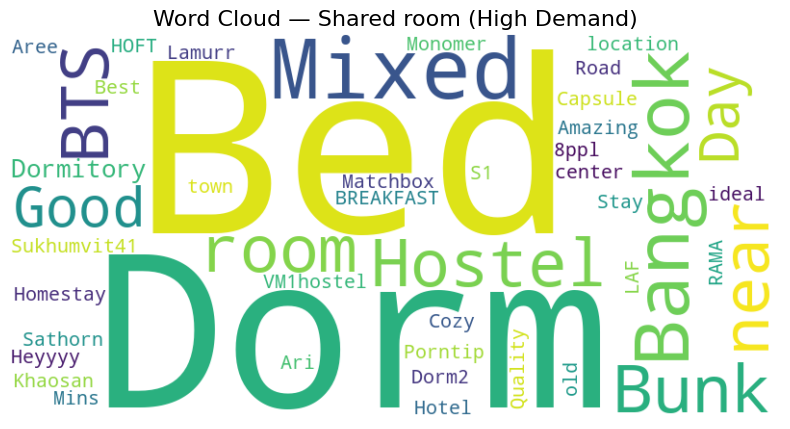

In [82]:
# Shared room
subset_shared = df_high_demand.loc[df_high_demand['room_type'] == 'Shared room', 'name']
wordcloud_shared = WordCloud(width=800, height=400, background_color='white').generate(' '.join(subset_shared))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_shared, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud — Shared room (High Demand)', fontsize=16)
plt.show()

**Insights:**

1. Dormitory & Bed Type Drive the Marketing

  - Large words like "Dorm", "Bed", "Mixed", "Bunk", and "Capsule" highlight that shared room listings focus heavily on type of sleeping arrangement and shared setup in their titles.

2. Transport Proximity Remains a Strong Hook

  - Mentions of "BTS" and "near" suggest that easy access to transit is still a top selling point, even for budget/shared accommodation.

3. Budget-Friendly, Social Atmosphere

  - Words like "Hostel", "Mixed", and "Homestay" emphasize communal living, social interaction, and affordable travel experiences.

4. Neighborhood & Local Appeal

  - Location names like "Bangkok", "Khaosan", "Ari", and "Sathorn" show that tourist and nightlife areas are central to high-demand shared room markets.

5. Experience-Driven Marketing

  - Descriptors such as "Good", "Amazing", and "Cozy" highlight a focus on positive guest experiences rather than just functional features.

6. Short-Stay Positioning

  - Words like "Day", "Mins", and "Stay" imply that shared rooms cater to shorter visits, likely from backpackers and transit travelers.

## Analysis - All Listings vs High Demand Listings
19. Market Share

  - What proportion of listings achieve high demand (>=50 bookings), and how is this distributed across Bangkok?

20. Room Type Preferences

  - Which room types dominate in high-demand segments, and how does this compare to the overall market distribution?

21. Geographic Coverage

  - Which neighborhoods have high-demand listings, and which areas have none?

22. Structural Differences

  - Do room type distributions in high-demand listings differ significantly from the overall market, and what does this reveal about guest preferences?

### Share of high demand listings vs all listings

In [83]:
(len(df_high_demand) / len(df)) * 100

9.769026883756153

**Insights:**

High demand listings (bookings >= 50) only make up **9,8%** out of the overall listings.


### Comparison (%) of high demand listings vs overall listings by room type

In [84]:
# Count % of each room_type in overall listings
overall_room_type_pct = (
    df['room_type']
    .value_counts(normalize=True) * 100
).round(2)

# Count % of each room_type in high-performing listings
high_demand_room_type_pct = (
    df_high_demand['room_type']
    .value_counts(normalize=True) * 100
).round(2)

# Combine into a single DataFrame for comparison
room_type_comparison = pd.DataFrame({
    'Overall (%)': overall_room_type_pct,
    'High Demand (%)': high_demand_room_type_pct
})

room_type_comparison

Overall (%)  High Demand (%)
room_type                                    
Entire home/apt        56.21            77.26
Private room           36.40            17.70
Hotel room              4.09             4.07
Shared room             3.30             0.97

In [85]:
# Ensure consistent order of room types
room_type_comparison = room_type_comparison.reset_index()

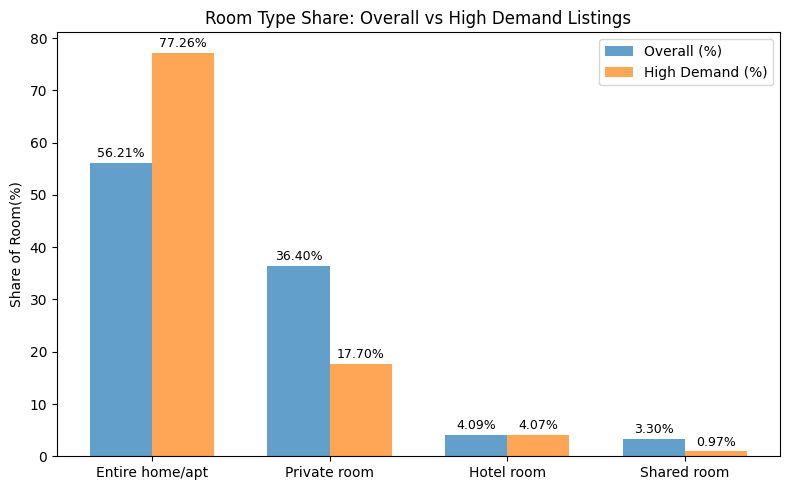

In [86]:
# Plot settings
plt.figure(figsize=(8, 5))
bar_width = 0.35
x = np.arange(len(room_type_comparison['room_type']))

bars1 = plt.bar(x, room_type_comparison['Overall (%)'], width=bar_width, label='Overall (%)', alpha=0.7)
bars2 = plt.bar(x + bar_width, room_type_comparison['High Demand (%)'], width=bar_width, label='High Demand (%)', alpha=0.7)

# Add labels on bars
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{height:.2f}%', ha='center', va='bottom', fontsize=9)

for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{height:.2f}%', ha='center', va='bottom', fontsize=9)

# Axis & title
plt.xticks(x + bar_width/2, room_type_comparison['room_type'])
plt.ylabel('Share of Room(%)')
plt.title('Room Type Share: Overall vs High Demand Listings')
plt.legend()
plt.tight_layout()

plt.show()

**Insights:**

1. **Entire home/apt** dominates high-performing listings

  - Share jumps from 56.21% overall to 77.26% in high-demand listings.

  - This indicates that travelers booking frequently (>=50 reviews) overwhelmingly prefer full-unit rentals, suggesting privacy and exclusivity are key demand drivers.

2. **Private room** share drops significantly

  - Falls from 36.40% overall to just 17.70% in high-demand listings.

  - Private rooms may appeal to a niche audience but are less likely to generate very high booking counts.

3. **Hotel room** proportion stays almost unchanged

  - Marginal change from 4.09% overall to 4.07% in high-demand listings.

  - This suggests hotel rooms have a consistent but limited presence in the Airbnb market, not strongly correlated with extremely high booking volumes.

4. **Shared room** is the weakest performer

  - Drops from 3.30% overall to 0.97% in high-demand listings.

  - This confirms shared rooms have limited appeal and rarely reach very high booking counts, potentially due to low privacy or niche targeting.

### Statistical test to determine the difference in room type distribution between all listings vs high demand listings (Chi Square)
Chi-square is used because the two data being tested are categorical data; Room Type (all listings) vs Room Type (high demand listings)
- H0: The distribution of room types is the same for all listings and for high-demand listings.
- H1: The distribution of room types is different between all listings and high-demand listings.

In [87]:
contingency = pd.concat([
    df['room_type'].value_counts(),
    df_high_demand['room_type'].value_counts()
], axis=1)
contingency.columns = ['Overall', 'High Demand']


# Run Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-square Statistic:", chi2)
print(f"p-value:, {p:.4f}")
print("Degrees of Freedom:", dof)

if p < 0.05:
    print("Statistically significant difference in room type distribution")
else:
    print("No statistically significant difference")

Chi-square Statistic: 274.35220592701967
p-value:, 0.0000
Degrees of Freedom: 3
Statistically significant difference in room type distribution


**Insights:**

The difference between the distribution of room types between all listings and high demand listings is statisically significant. So the difference isn't due to chance — it reflects real market preferences in what types of properties attract higher bookings. (Reject H0)

### Comparison of room type prices by neighbourhood between high demand listings and overall listings

#### High demand listings

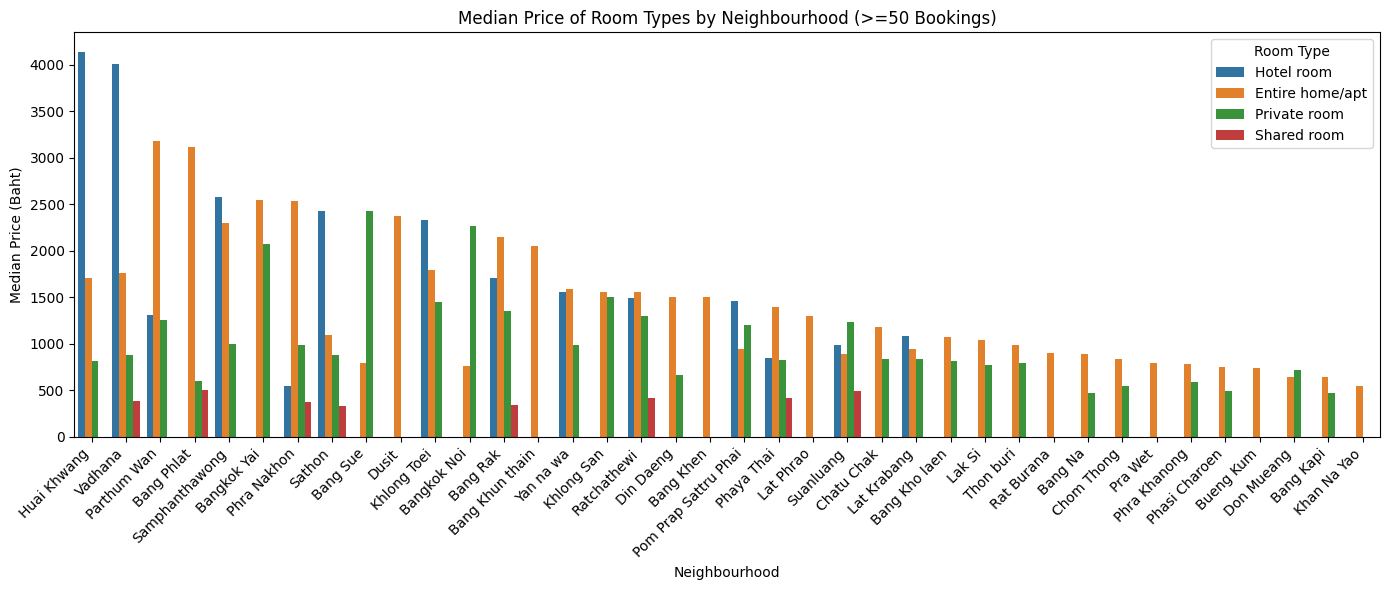

In [88]:
plt.figure(figsize=(14, 6))
sns.barplot(data=avg_price_by_segment,
            x='neighbourhood', y='median_price', hue='room_type')
plt.xticks(rotation=45, ha='right')
plt.title('Median Price of Room Types by Neighbourhood (>=50 Bookings)')
plt.ylabel('Median Price (Baht)')
plt.xlabel('Neighbourhood')
plt.legend(title='Room Type')
plt.tight_layout()
plt.show()

#### All listings

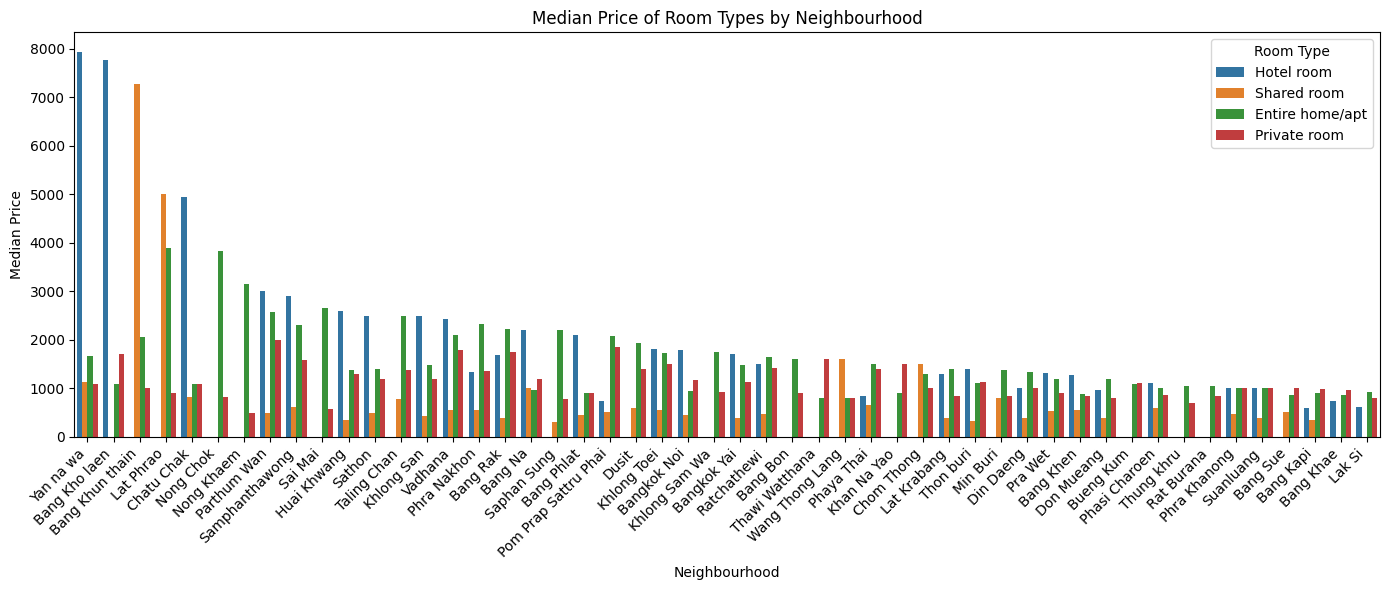

In [89]:
plt.figure(figsize=(14, 6))
sns.barplot(data=df_room_price_neighbourhood, x='neighbourhood', y='median_price', hue='room_type')
plt.title('Median Price of Room Types by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Median Price')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Room Type')
plt.tight_layout()
plt.show()

1. Scope of Listings

  - First chart only includes high-demand listings (>=50 bookings).

  - Second chart includes all listings, regardless of demand level.

  - This difference in filtering changes which neighborhoods appear at the top and how prices are distributed.

2. Price Levels & Outliers

  - High-demand chart (Chart 1) shows more moderate price ranges, with most medians below ฿4,500.

  - All listings chart (Chart 2) reveals some extreme high medians (฿7,000–฿8,000), likely driven by low-booking luxury properties.

  - This suggests price alone doesn’t guarantee demand — some very high-priced listings do not achieve high bookings.

3. Room Type Positioning

  - In the high-demand segment, the ranking by price is more consistent — hotel rooms remain the most expensive, followed by entire home/apt, private rooms, and shared rooms.

  - In the overall dataset, this hierarchy is less stable — in some neighborhoods, private rooms or shared rooms appear unusually expensive, likely due to niche or specialty listings.

4. Neighbourhood Dynamics

  - High-demand chart emphasizes neighborhoods like Huai Khwang, Vadhana, Parthum Wan, and Bang Phlat where premium prices still attract >=50 bookings — indicating strong market acceptance.

  - Overall chart shows additional neighborhoods (e.g., Yan Nawa, Bang Kho Laem) with very high prices, but they do not necessarily appear in the high-demand set — indicating possible overpricing or low demand.

### Neighbourhoods that appear in high demand listings vs overall listings

In [90]:
# Overall listings neighbourhoods
overall_neighbourhoods = sorted(df['neighbourhood'].unique())
f"Overall listings - unique neighbourhoods: {len(overall_neighbourhoods)}"
overall_neighbourhoods

# High demand listings neighbourhoods
high_demand_neighbourhoods = sorted(df_high_demand['neighbourhood'].unique())
f"\nHigh demand listings - unique neighbourhoods: {len(high_demand_neighbourhoods)}"
high_demand_neighbourhoods

['Bang Kapi',
 'Bang Khen',
 'Bang Kho laen',
 'Bang Khun thain',
 'Bang Na',
 'Bang Phlat',
 'Bang Rak',
 'Bang Sue',
 'Bangkok Noi',
 'Bangkok Yai',
 'Bueng Kum',
 'Chatu Chak',
 'Chom Thong',
 'Din Daeng',
 'Don Mueang',
 'Dusit',
 'Huai Khwang',
 'Khan Na Yao',
 'Khlong San',
 'Khlong Toei',
 'Lak Si',
 'Lat Krabang',
 'Lat Phrao',
 'Parthum Wan',
 'Phasi Charoen',
 'Phaya Thai',
 'Phra Khanong',
 'Phra Nakhon',
 'Pom Prap Sattru Phai',
 'Pra Wet',
 'Rat Burana',
 'Ratchathewi',
 'Samphanthawong',
 'Sathon',
 'Suanluang',
 'Thon buri',
 'Vadhana',
 'Yan na wa']

In [91]:
# Get neighbourhood sets
overall_neighbourhoods = set(df['neighbourhood'].unique())
high_demand_neighbourhoods = set(df_high_demand['neighbourhood'].unique())


# Find neighbourhoods in overall but not in high demand
missing_in_high_demand = sorted(overall_neighbourhoods - high_demand_neighbourhoods)

f"Neighbourhoods in overall listings but NOT in high demand listings:"
missing_in_high_demand

['Bang Bon',
 'Bang Khae',
 'Khlong Sam Wa',
 'Min Buri',
 'Nong Chok',
 'Nong Khaem',
 'Sai Mai',
 'Saphan Sung',
 'Taling Chan',
 'Thawi Watthana',
 'Thung khru',
 'Wang Thong Lang']

**Insights:**

1. Although all neighbourhoods have listings in them, only 38/50 neighbourhoods prove to be in high demand(bookings >= 50)

2. The neighbourhoods that doesn't have high demand are:
- Bang Bon
- Bang Khae
- Khlong Sam Wa
- Min Buri
- Nong Chok
- Nong Khaem
- Sai Mai
- Saphan Sung
- Taling Chan
- Thawi Watthana
- Thung khru
- Wang Thong Lang

# **All Insights**



## **Analysis – Market Distribution**
1. **Top 5 neighbourhoods by amount of total rooms:**  
   - Vadhana (2,151)  
   - Khlong Toei (2,097)  
   - Huai Khwang (1,125)  
   - Ratchathewi (1,114)  
   - Bang Rak (827)  
   - Distribution is fairly even across Bangkok except for far-edge neighbourhoods.

2. **Top 5 neighbourhoods by amount of Entire home/apt:**  
   - Khlong Toei (1,520)  
   - Vadhana (1,451)  
   - Huai Khwang (776)  
   - Ratchathewi (656)  
   - Sathon (556)  
   - Similar distribution to overall listings — available almost everywhere.

3. **Top 5 neighbourhoods by amount of Hotel room:**  
   - Vadhana (104)  
   - Phra Nakhon (77)  
   - Khlong Toei (73)  
   - Ratchathewi (70)  
   - Bang Rak (67)  
   - More concentrated in specific areas.

4. **Top 5 neighbourhoods by amount of Private room:**  
   - Vadhana (543)  
   - Khlong Toei (489)  
   - Bang Rak (375)  
   - Phra Nakhon (355)  
   - Ratchathewi (327)  
   - Available in every neighbourhood.

5. **Top 5 neighbourhoods by amount of Shared room:**  
   - Phra Nakhon (131)  
   - Ratchathewi (61)  
   - Vadhana (53)  
   - Bang Rak (34)  
   - Huai Khwang (23)  
   - Limited distribution like hotel rooms.

6. Room type distribution differs significantly across neighbourhoods (Chi-square, p < 0.05).  
7. Most neighbourhoods have 1–3 night minimum stay, but Rat Burana (15 nights) and Bang Sue (5 nights) are exceptions.  
8. Most neighbourhoods are dominated by short-stay (1–7 nights) listings.

---

## **Analysis – Competition**
1. Median properties per host: 1–9.  
2. Top 5 by most properties per host: Ratchathewi (9), Sathon (9), Khlong Toei (8), Huai Khwang (8), Bang Rak (7).  
3. **Large operators** (50+ properties managed) only operates in **16/50 Neighbourhoods**.

- Neighbourhoods that have **4 large operators**:
  - Bang Rak (92 properties)
  - Khlong Toei (108 properties)
  - Vadhana (50 properties)

- Neighbourhoods that have **3 large operators**:
  - Ratchathewi (94 properties)
  - Huai Khwang (72 properties)
  - Sathon (58 properties)

- Neighbourhoods that have **2 large operators**:
  - Phra Nakhon (90 properties)
  - Phra Khanong (9 properties)
  - Bang Phlat (6 properties)

- Neighbourhoods that have **1 large operators**:
  - Phaya Thai (12 properties)
  - Samphanthawong (10 properties)
  - Yan na wa (1 properties)
  - Parthum Wan (25 properties)
  - Rat Burana (1 properties)
  - Thung khru (3 properties)
  - Pom Prap Sattru Phai (18 properties)

4. **Medium operators** (11 - 50 properties managed) operates in **42/50 neighbourhoods**. The top 5 neighbourhoods with **most amount of operators** are:
  - Khlong Toei (85 operators)
  - Vadhana	(78 operators)
  - Huai Khwang	(55 operators)
  - Ratchathewi	(48 operators)
  - Sathon	(33 operators)
---

## **Analysis – Price**
1. **Top 5 median prices:** Nong Chok (฿2,539), Parthum Wan (฿2,395), Samphanthawong (฿2,000), Vadhana (฿2,000), Bang Rak (฿1,850).  
2. **Bottom 5 median prices:** Nong Khaem (฿658), Wang Thong Lang (฿815), Don Mueang (฿820), Lak Si (฿850), Bang Khen (฿882).  
3. **Median price ranking by room type:**  
   - Hotel room (฿1,700)  
   - Entire home/apt (฿1,536)  
   - Private room (฿1,212)  
   - Shared room (฿500)
4. Room type price range by 25th (cheap) and 75th (expensive) quartile

- Entire home/apt

  - Q1 (25th percentile): ~฿1,029

  - Q3 (75th percentile): ~฿2,571

  - Interpretation: The middle 50% of entire homes are priced between ~1,000 and ~2,600. This shows a broad mid-range market where travelers can find both budget-friendly and premium entire homes.

- Hotel room

  - Q1: ~฿996

  - Q3: ~฿3,171

  - Interpretation: Hotel rooms have the widest spread of prices among all categories. The Q3 is higher than for entire homes, suggesting that premium/luxury hotels significantly pull up prices.

- Private room

  - Q1: ~฿800

  - Q3: ~฿2,090

  - Interpretation: Private rooms span a wide range, but the lower quartile starts cheaper than entire homes.Still, the upper quartile approaches entry-level entire homes, which may reduce their competitiveness for travelers seeking privacy.

- Shared room

  - Q1: ~฿390

  - Q3: ~฿650

  - Interpretation: Shared rooms are consistently the lowest-priced option.
The interquartile range (IQR) is very narrow (~260), meaning price variation is limited, and competition is primarily cost-driven rather than value-added.

5. Statistically significant differences in prices between room types.  
6. Range of median prices of all neighbourhoods
  - Entire home/apt: ฿1,000–฿2,500 (with some high outliers).  
  - Private room: ฿800–฿2,000.  
  - Hotel room: ฿500–฿3,000 (**Bang Kho laen** (฿ 7800), **Yan na wa** (฿ 7800), and **Chatu Chak** (฿ 5000) being the **outlier** by a **very high margin**).  
  - Shared room: ฿500–฿1,500 (**Bang Khun thain** (฿ 7200) and **Lat Phrao** (฿ 5000) being the **outlier** by a **very high margin**).  
  - Hotel rooms are usually the most expensive or second-most expensive in a neighbourhood.  
7. Shared rooms are usually the cheapest.

---

## **Analysis – Demand**
1. **Total bookings by room type:**
  - Entire home/apt (197,626)
  - Private room (50,710)
  - Hotel room (12,700)
  - Shared room (2,682)  
2. **Bookings last 12 months by room type:**
  - Entire home/apt (44,530)
  - Private room (9,185)
  - Hotel room (1,258)
  - Shared room (218).  
3. **Top 5 neighbourhoods by total bookings:**
  - Khlong Toei
  - Vadhana
  - Sathon
  - Ratchathewi
  - Huai Khwang.  
4. **Top 5 neighbourhoods by last 12 months bookings:**
  - Khlong Toei
  - Vadhana
  - Ratchathewi
  - Bang Rak
  - Sathon.  
5. Hotel Rooms (50+ bookings)
  - **Huai Khwang** and **Vadhana** command the **highest median prices** (above ฿4,000) while still having >=50 bookings — showing **strong willingness to pay** in these areas.

  - **Parthum Wan** and **Bang Phlat** also achieve premium pricing (฿2,500–฿3,000+).

  - In **most neighbourhoods**, **hotel rooms remain the highest-priced segment**, making them ideal for luxury positioning and premium services.

6. Entire Home/Apt (50+ bookings)
  - **Parthum Wan** and **Bang Phlat** lead with prices above ฿3,000.

  - **Huai Khwang**, **Samphanthawong**, **Bangkok Yai** are also above the ฿2,500 range, suggesting strong market acceptance for premium entire units in these districts.

  - **Across many neighbourhoods**, **this category has a wide price spread**, meaning location and property quality heavily influence price.

7. Private Rooms (50+ bookings)
  - **Bangkok Yai** and **Bang Sue** **stand out with median prices** in the **฿2,000–฿2,500 range**, well **above the typical ฿800–฿1,500** seen in most neighbourhoods.

  - **Parthum Wan** and **Bang Phla**t also sustain **relatively high private room price** while keeping demand strong.

8. Shared Rooms (50+ bookings)
  - **Most neighbourhoods** price shared rooms in the ฿500–฿700 range, but **Huai Khwang** and **Bang Khun Thian** show **significantly higher rates**.

  - In lower-priced neighbourhoods, shared rooms may cater to budget backpackers, while in higher-priced ones, they may be targeted at short-term co-living or niche stays.
9. Price differences in high-demand segment are statistically significant.
10. Just increasing or decreasing price alone does not explain changes in demand. Demand might be driven more by other factors — location (neighbourhood), room type, seasonality, etc.
11. Top 5 neighbourhoods by amount of Entire home/apt (high demand listings):
  - Vadhana:	199
  - Khlong Toei:	196
  - Sathon	104:
  - Ratchathewi:	97
  - Bang Rak:	93

12. Top 5 neighbourhoods by amount of Private room (high demand listings):
  - Ratchathewi:	31
  - Phra Nakhon:	27
  - Huai Khwang:	22
  - Vadhana:	21
  - Phaya Thai:	18

13. Top 5 neighbourhoods by amount of Hotel room (high demand listings):
  - Ratchathewi:	15
  - Khlong Toei:	12
  - Vadhana:	8
  - Phra Nakhon:	6
  - Lat Krabang:	6

14. Top 5 neighbourhoods by amount of Shared room (high demand listings):
  - Phra Nakhon:	4
  - Ratchathewi:	3
  - Vadhana:	2
  - Phaya Thai:	2
  - Bang Phlat:	1

### Sentiment Analysis Using Wordcloud (High Demand Listings)

#### 1. Entire home/apt

- Location Proximity is a Major Selling Point

  - Frequent mentions of "BTS", "MRT", "Sukhumvit", "Asok", "Central", "Downtown", and "Near" show that high-demand listings emphasize closeness to public transport and key areas.

  - This indicates that ease of mobility is one of the most attractive factors for guests.

- Amenities are Highlighted

  - Words like "WIFI", "Netflix", "Pool", "Gym", and "Suite" suggest that convenience and in-room entertainment are promoted heavily.

  - Amenities likely play a role in converting interest into bookings.

- Property Type & Style Appeal

  - Frequent terms: "Condo", "Apartment", "Studio", "Loft", "Penthouse", and "Modern" reflect a trend toward urban, stylish living spaces.

  - The use of "Luxury" and "Deluxe" suggests a push toward upscale positioning.

- Size & Comfort Messaging

  - Words like "2BR", "3BR", "Spacious", "Cozy", "Quiet" show hosts emphasizing both functional size and atmosphere.

  - This caters to different segments — families needing space, and solo/couple travelers looking for comfort.



#### 2. Private room

- Proximity to Public Transport is Critical

  - Dominant mentions of "near", "BTS", "MRT", "Subway", and "walk" reinforce that easy access to transportation is a top selling point for high-demand private rooms.

- City Branding in Titles

  - Frequent use of "Bangkok", "Siam", "Old Town", and "City Center" suggests that hosts leverage recognizable and appealing location names to attract bookings.

- Emphasis on Room Privacy & Comfort

  - Keywords like "Private", "Room", "House", "Loft", and "Balcony" highlight that privacy and home-like features are important even in private room setups.

- Amenities & Lifestyle Features

  - Common mentions of "WiFi", "Free WiFi", "Netflix", "Breakfast", and "Kitchen" show that including basic conveniences and extra perks increases listing appeal.

- Atmosphere & Experience-Oriented Language

  - Words like "Cozy", "Vintage", "Chic", "Antique", and "Family" reflect attempts to differentiate listings through style, charm, and target audience focus (e.g., families, budget travelers, solo explorers).

- Time & Distance Promises

  - Phrases like "10 min", "1 min", "750m", and "walk to" show that specific proximity claims are used as persuasive hooks.

#### 3. Hotel room

- Transport Accessibility is a Strong Draw

  - Large mentions of "BTS", "Near", and "MRT" emphasize that high-demand hotel rooms often promote their proximity to public transportation.

- Room Type & Bed Configuration are Highlighted

  - Keywords like "Double", "Private", "Large room", "Dorm", and "Studio" show that specifying room size and bed type is important to set guest expectations.

- Leisure Amenities are Key Selling Points

  - The prominence of "Pool", "Parkview", "Garden", "Rooftop", and "View" reflects the role of lifestyle and relaxation facilities in attracting bookings.

- Unique & Brand-Like Names Stand Out

  - Words like "Mustang", "Nero", "Zebra", and "Flamingo" suggest that distinctive property names or thematic branding may help differentiate hotel listings from generic ones.

- Location-Specific Appeal

  - Mentions of "Bangkok", "Siam", "Old Town", and "Chatuchak" show that referencing tourist-friendly areas increases attractiveness.

- Extra Comfort & Experience Features

  - Frequent references to "Comfy", "Breakfast", "Bath", "Family", and "Orientale" indicate an emphasis on comfort, service inclusions, and cultural touches.

#### 4. Shared room

- Dormitory & Bed Type Drive the Marketing

  - Large words like "Dorm", "Bed", "Mixed", "Bunk", and "Capsule" highlight that shared room listings focus heavily on type of sleeping arrangement and shared setup in their titles.

- Transport Proximity Remains a Strong Hook

  - Mentions of "BTS" and "near" suggest that easy access to transit is still a top selling point, even for budget/shared accommodation.

- Budget-Friendly, Social Atmosphere

  - Words like "Hostel", "Mixed", and "Homestay" emphasize communal living, social interaction, and affordable travel experiences.

- Neighborhood & Local Appeal

  - Location names like "Bangkok", "Khaosan", "Ari", and "Sathorn" show that tourist and nightlife areas are central to high-demand shared room markets.

- Experience-Driven Marketing

  - Descriptors such as "Good", "Amazing", and "Cozy" highlight a focus on positive guest experiences rather than just functional features.

- Short-Stay Positioning

  - Words like "Day", "Mins", and "Stay" imply that shared rooms cater to shorter visits, likely from backpackers and transit travelers.

## **Analysis – All listings vs High demand listings**
1. High demand listings (>=50 bookings) are only **9.8%** of all listings.  
2. **Entire home/apt**: 56.21% overall → 77.26% high-demand.  
3. **Private room**: 36.40% overall → 17.70% high-demand.  
4. **Hotel room**: 4.09% overall → 4.07% high-demand.  
5. **Shared room**: 3.30% overall → 0.97% high-demand.  
6. Only 38/50 neighbourhoods have high-demand listings.  
   - Missing: Bang Bon, Bang Khae, Khlong Sam Wa, Min Buri, Nong Chok, Nong Khaem, Sai Mai, Saphan Sung, Taling Chan, Thawi Watthana, Thung Khru, Wang Thong Lang.  
7. **Chi-square test** confirms statistically significant difference between room type distributions in all vs high demand listings — differences are structural, not random.  
8. This means the difference isn't due to chance — it reflects real market preferences in what types of properties attract higher bookings.

---

# Recommendation

## SWOT Analysis — Determining the Room Types

### Strengths
- **Entire home/apt**:  
  - Dominates high-demand market share (77.26%).  
  - Strong appeal from privacy, space, and upscale image supported by location proximity to transport (BTS, MRT, Sukhumvit, Asok) and premium amenities (WiFi, Netflix, Pool, Gym).  
  - Works well in premium, high-connectivity neighbourhoods (Khlong Toei, Vadhana, Bang Rak).  

- **Private room**:  
  - Targets budget-conscious guests while still offering privacy.  
  - Strong demand drivers include transport accessibility (BTS, MRT, Subway), city branding (Bangkok, Siam, Old Town), and added conveniences like WiFi and breakfast.  
  - Performs well in transport-linked mid-cost areas (Ratchathewi, Huai Khwang, Sathon).  

- **Hotel room**:  
  - Stable demand share with clear amenity advantages (Pool, Parkview, Garden) and ability to brand experiences uniquely (“Mustang”, “Nero”).  
  - Concentrated in tourist-heavy zones with BTS/MRT access (Bang Rak, Phra Nakhon, Pathum Wan).  

- **Shared room**:  
  - Appeals to niche budget traveler and backpacker segment.  
  - Strong association with social atmosphere and dorm-type setup in nightlife/backpacker areas (Khaosan, Ari, Sathorn).  

---

### Weaknesses
- **Entire home/apt**:  
  - Higher operational costs and competition from established premium listings.  
  - Requires significant capital for furnishing and amenities to meet guest expectations.

- **Private room**:  
  - Smaller market share (17.70% in high-demand listings).  
  - Competes heavily with budget hotels and entire home/apartment rentals at slightly higher prices.  

- **Hotel room**:  
  - Small share of high-demand listings (4.07%), making scaling harder.  
  - High overhead costs compared to other room types.  

- **Shared room**:  
  - Minimal high-demand presence (0.97%).  
  - Limited appeal beyond budget travelers.  

---

### Opportunities
- **Entire home/apt**:  
  - Further capitalize on premium positioning by focusing on neighbourhoods with strong BTS/MRT connections and high tourist activity (Khlong Toei, Vadhana, Bang Rak).  
  - Expand amenity offerings (smart TVs, workspace setups, luxury bedding) to justify premium pricing.  

- **Private room**:  
  - Leverage proximity marketing (“1 min to BTS”) and distinctive style (Vintage, Chic) to differentiate from standard budget stays.    

- **Hotel room**:  
  - Position properties as lifestyle destinations with unique branding/themes to stand out from generic hotels.  
  - Focus expansion in high-tourist traffic neighbourhoods underserved by large operators (Phra Nakhon, Pathum Wan).  

- **Shared room**:  
  - Expand in backpacker/nightlife districts (Khaosan, Ari, Sathorn) with added-value experiences (city tours, pub crawls).  
  - Use short-stay positioning to target transit travelers.  

---

### Threats
- **Entire home/apt**:  
  - Price competition from other premium listings and hotels.  
  - Dependence on tourist flows; economic downturns and low seasons can quickly impact demand (usually reserved for family or 4 or more tourists per listings).  

- **Private room**:  
  - Vulnerable to undercutting from hostels and budget hotels.  
  - Lower booking volumes compared to entire homes may limit profitability.  

- **Hotel room**:  
  - Competes with well-established hospitality brands and chain hotels with larger marketing budgets.  

- **Shared room**:  
  - Susceptible to market fluctuations affecting backpacker and budget tourism.  
  - Strong competition from established hostels in prime tourist areas.


## Room Type Specific Recommendations

### 1. Entire home/apt

- **Why**  
  High-demand entire home/apartment listings dominate the market share (77.26% of high-demand listings). Wordcloud analysis shows guests are strongly attracted to properties near public transport (BTS, MRT, Sukhumvit, Asok) and city hubs, as well as listings that highlight premium amenities (WiFi, Netflix, Pool, Gym) and upscale property types (Condo, Penthouse, Modern, Loft). This indicates a preference for privacy, convenience, and style in urban environments.

- **Action**  
  - In listing titles and descriptions, prominently highlight proximity to BTS/MRT and major hubs.  
  - Include and advertise premium amenities like high-speed WiFi, streaming services, and access to pools/gyms.  
  - Use upscale descriptors (“Luxury”, “Modern”, “Deluxe”) and property type mentions (Condo, Loft) to target higher-spending travelers.  
  - Showcase both functional size (2BR, 3BR, Spacious) and atmosphere (Cozy, Quiet) to appeal to families and couples alike.  

- **Neighbourhood to Focus**  
  Focus on neighbourhoods already strong in high-demand listings and well-connected to BTS/MRT, such as Khlong Toei, Vadhana, and Sathon — areas with proven demand and premium positioning potential.

- **Price**  
  Maintain premium pricing relative to market averages, supported by superior location and amenities, but monitor competition in key BTS/MRT-linked neighbourhoods to avoid overpricing.
  - Lower bound price: ~฿1,029
  - Upper bound price: ~฿2,571

---

### 2. Private room

- **Why**  
  While private rooms represent only 17.70% of high-demand listings, demand drivers are clear: proximity to transport (BTS, MRT, Subway, “walk to”), city branding (Bangkok, Siam, Old Town), privacy, and budget-friendly comfort. Wordclouds show that basic amenities (WiFi, Free WiFi, Netflix, Breakfast) and stylistic features (Cozy, Chic, Antique) improve appeal.

- **Action**  
  - Lead titles with location proximity claims (“1 min to BTS”, “Near MRT Siam”) to strengthen search relevance.  
  - Highlight privacy features in descriptions (Private Room, Balcony, Loft, House).  
  - Offer added-value basics like breakfast or free WiFi, even if simple, to stand out in the budget-conscious segment.  
  - Use style descriptors (“Vintage”, “Chic”) to target niche traveler preferences (e.g., solo explorers, couples).  

- **Neighbourhood to Focus**  
  Focus on neighbourhoods with solid transport links but potentially lower property costs, such as Ratchathewi, Huai Khwang, and Phra Nakhon, where medium operators are active and competitive pricing can capture demand.

- **Price**  
  Keep rates competitive within the budget to mid-tier range, with small premiums justified for strong location or distinctive style.
  - Lower bound price: ~฿800
  - Upper bound price: ~฿2,090

---

### 3. Hotel room

- **Why**  
  Hotel rooms have stable but small market share (4.07% in high-demand listings). Wordcloud results show transport proximity (BTS, MRT) remains important, but amenities and brand-like differentiation (“Mustang”, “Nero”) can significantly improve appeal. Guests value leisure facilities (Pool, Parkview, Garden) and clear room/bed specifications.

- **Action**  
  - Emphasize transport proximity in listing titles and hotel descriptions.  
  - Include leisure-focused imagery showcasing pools, gardens, and rooftop spaces.  
  - Brand rooms or packages with unique names/themes to stand out from generic hotel listings.  
  - Clearly state bed types (Double, Twin) and room size to meet guest expectations.  

- **Neighbourhood to Focus**  
  Prioritize tourist-heavy and high demand areas with strong BTS/MRT links such as Ratchatewi, Khlong Toei, and Vadhana.

- **Price**  
  Position pricing mid-to-premium depending on amenity set; use seasonal promotions to capture shoulder-season (season between high and low seasons) demand.
  - Lower bound price: ~฿996
  - Upper bound price: ~฿3,171

---

### 4. Shared room

- **Why**  
  Shared rooms are the smallest segment (0.97% of high-demand listings) but cater to budget-conscious and social travelers. Wordcloud results highlight dorm and bed type prominence (Dorm, Mixed, Bunk, Capsule), transport access (BTS, “near”), and experience-based terms (Hostel, Homestay, Cozy). Locations like Khaosan and Ari indicate nightlife and backpacker appeal.

- **Action**  
  - Clearly specify dorm setup, bed type, and shared facilities in titles (“Mixed Dorm 8 Bed near BTS Ari”).  
  - Focus marketing on social and community aspects (shared lounges, events).  
  - Highlight affordability and short-stay suitability for transit travelers.  
  - Promote proximity to nightlife or backpacker districts in descriptions.  

- **Neighbourhood to Focus**  
  Focus on high demand areas like Phra Nakhon, Ratchatewi, and Vadhana.

- **Price**  
  Maintain highly competitive, low rates to capture budget travelers, with optional upsells for lockers, breakfast, or tours.
  - Lower bound price: ~฿390
  - Upper bound price: ~฿650